In [11]:
import matplotlib.pyplot as plt
import numpy as np
import eFELExt
import re

In [12]:
n = 53

In [13]:
note = [ '' ] * n

# AP amplitude check

control_136 2299 5 | 0
AP_amplitude:	 63.0 	


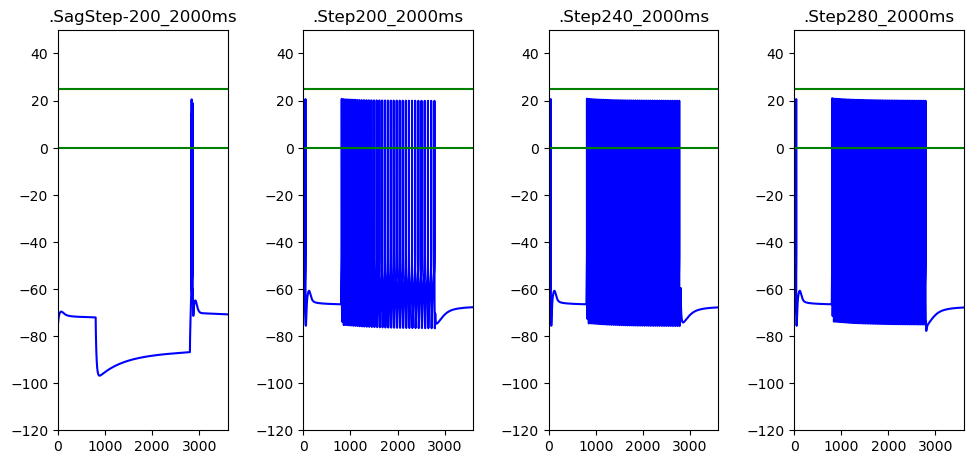





control_136 3537 6 | 1
AP_amplitude:	 54.8 	


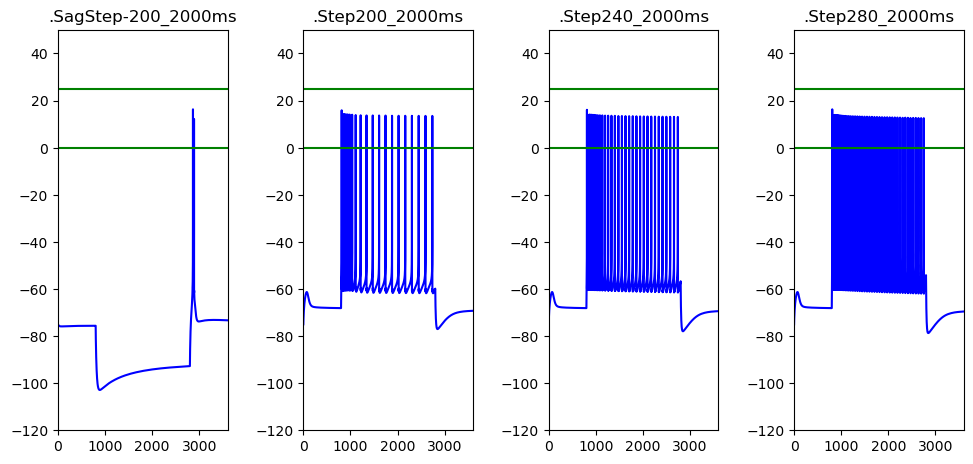





control_136 3844 6 | 2
AP_amplitude:	 59.2 	


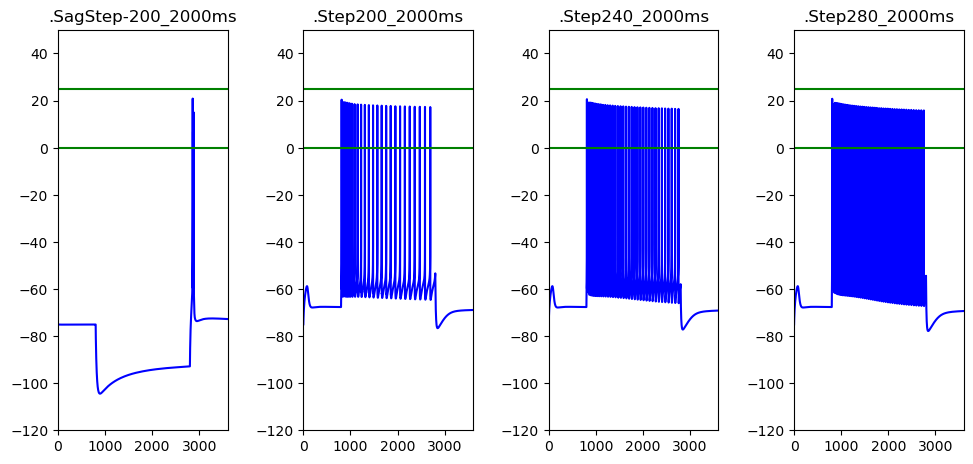





control_136 5818 1 | 3
AP_amplitude:	 54.8 	


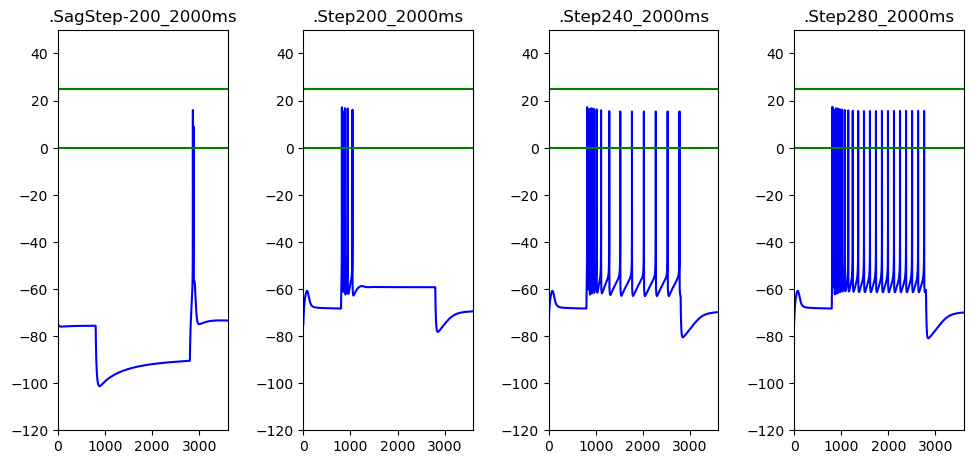





control_136 7271 6 | 4
AP_amplitude:	 33.6 	<<<


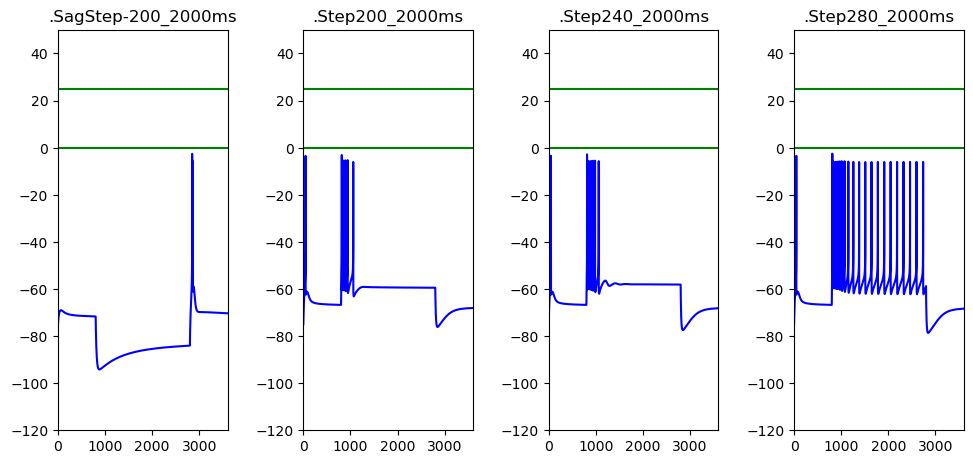

AP too short



control_136 7597 5 | 5
AP_amplitude:	 65.9 	<<<


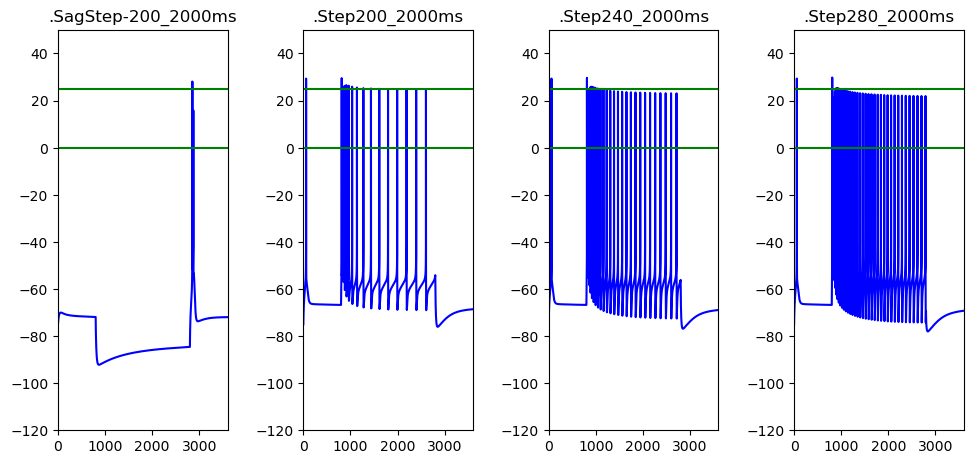

AP too tall



control_136 8303 2 | 6
AP_amplitude:	 24.4 	<<<


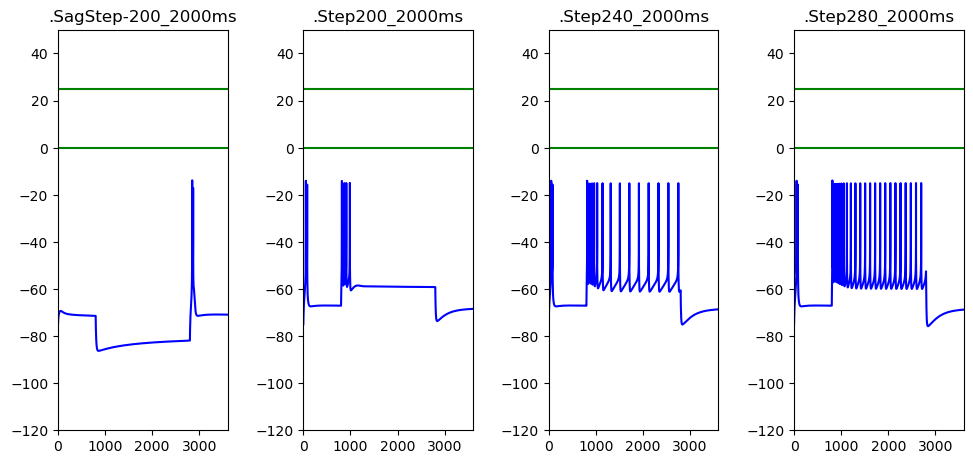

AP too short



control_136 8553 6 | 7
AP_amplitude:	 23.6 	<<<


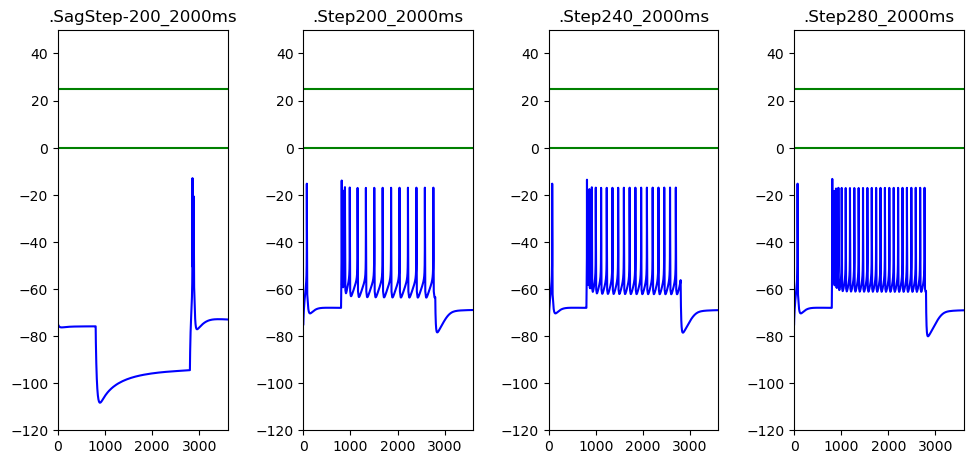

AP too short



control_136 8621 1 | 8
AP_amplitude:	 28.7 	<<<


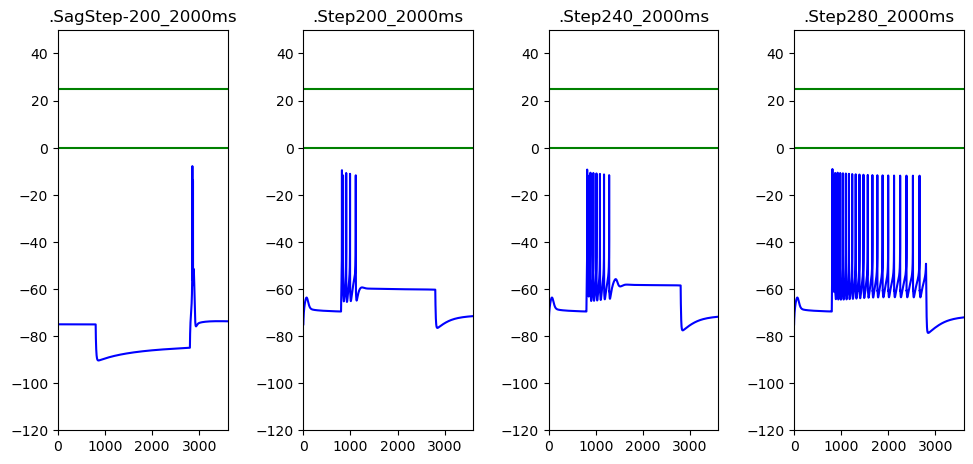

AP too short



control_136 9288 9 | 9
AP_amplitude:	 35.6 	<<<


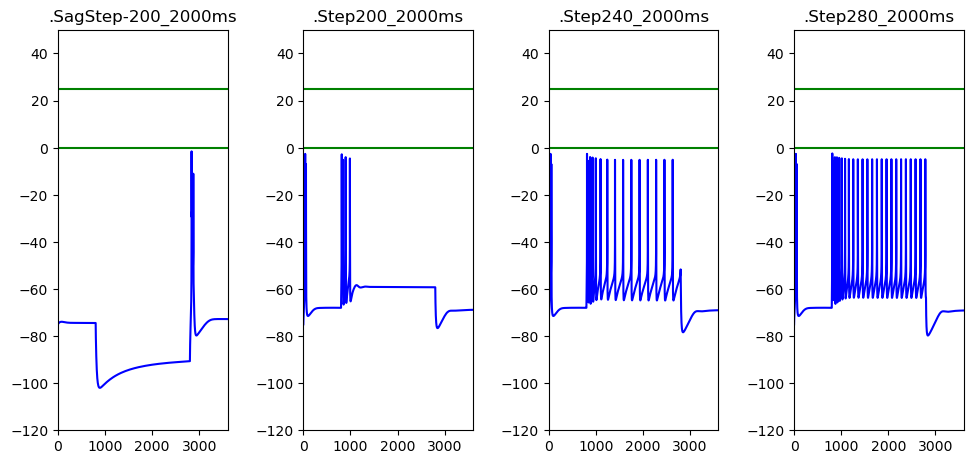

AP too short



control_136 9289 5 | 10
AP_amplitude:	 52.4 	


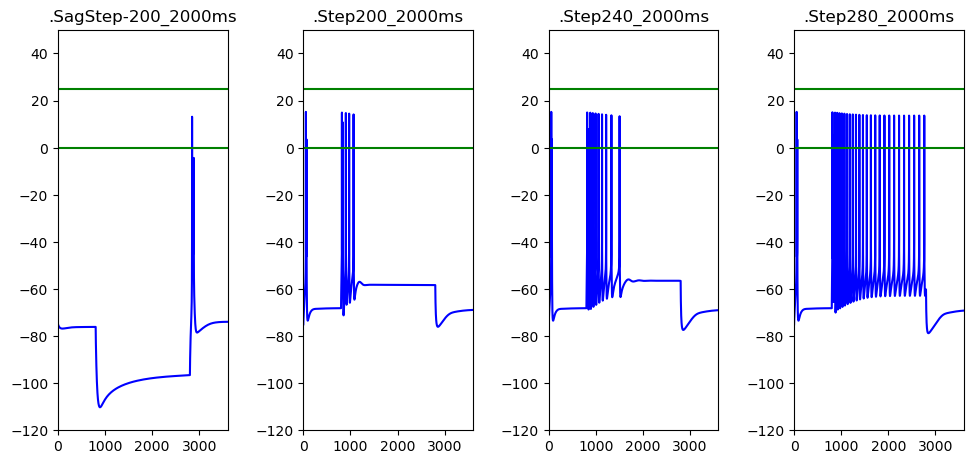





control_136 9532 1 | 11
AP_amplitude:	 32.2 	<<<


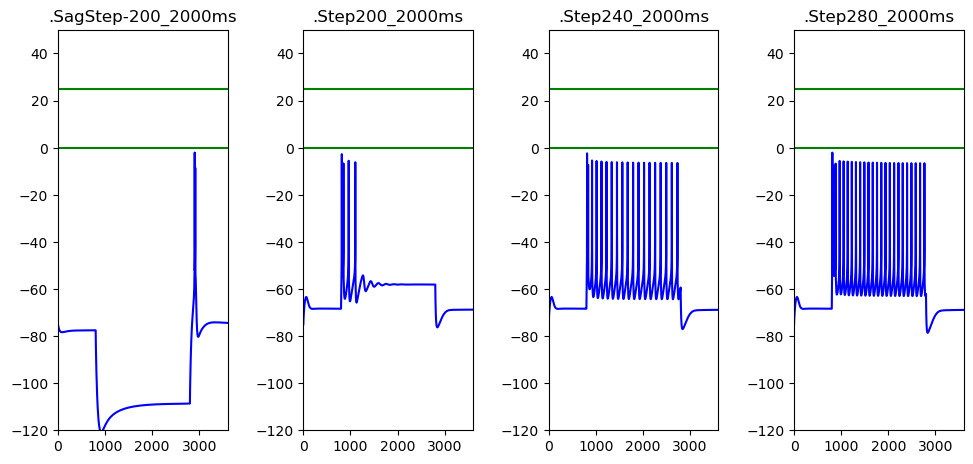

AP too short



control_136 10817 5 | 12
AP_amplitude:	 35.7 	<<<


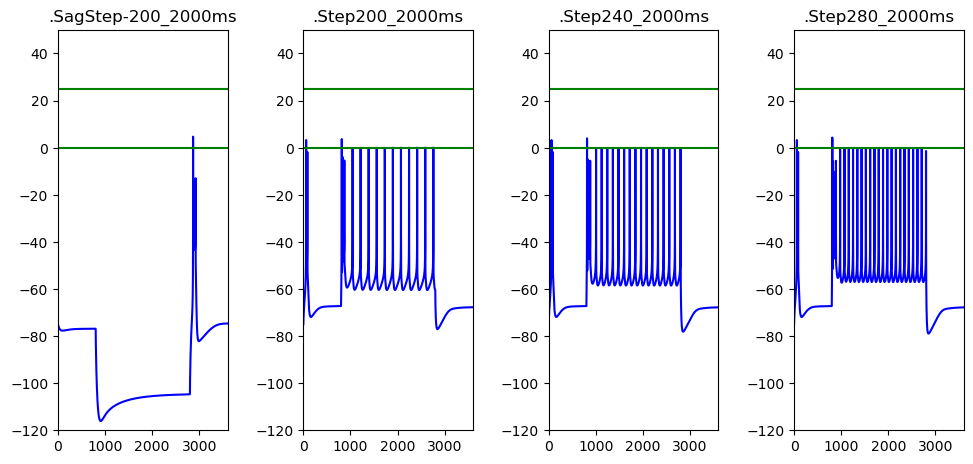

AP too short



control_136 11337 6 | 13
AP_amplitude:	 27.1 	<<<


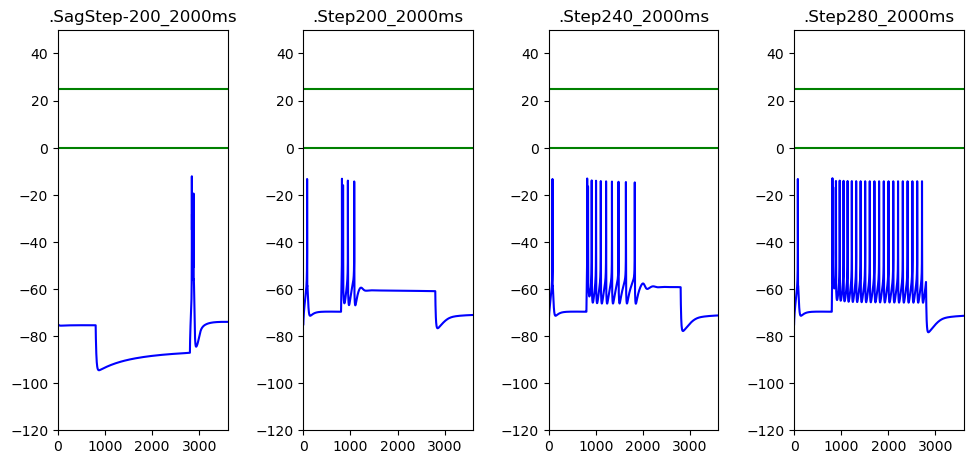

AP too short



control_136 11755 1 | 14
AP_amplitude:	 26.1 	<<<


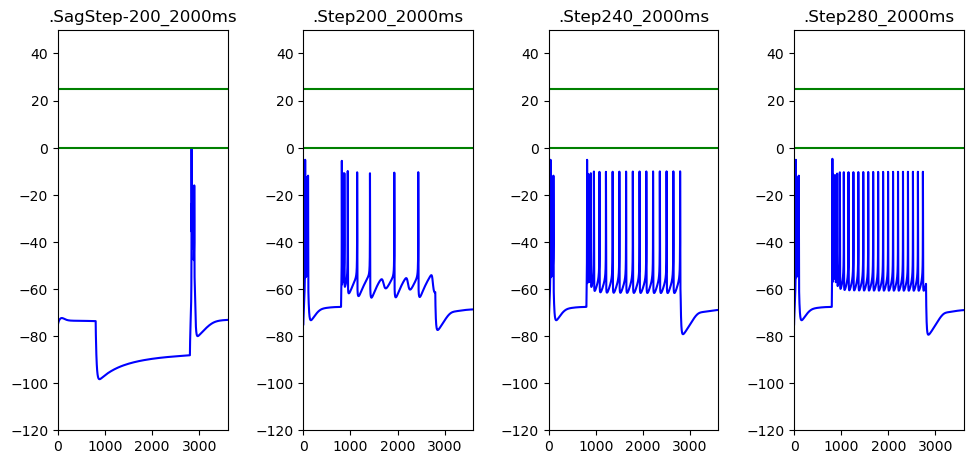

AP too short



control_136 11796 6 | 15
AP_amplitude:	 28.3 	<<<


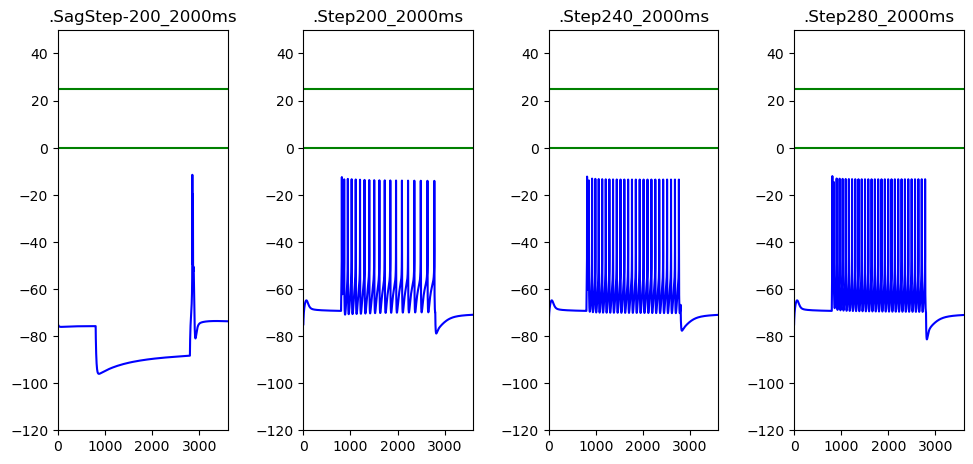

AP too short



control_136 12031 6 | 16
AP_amplitude:	 54.7 	


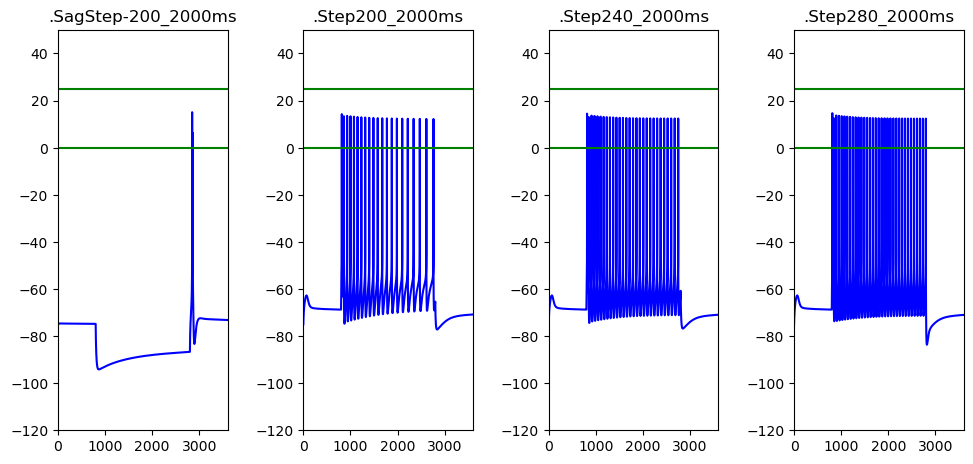





control_136 12256 14 | 17
AP_amplitude:	 28.3 	<<<


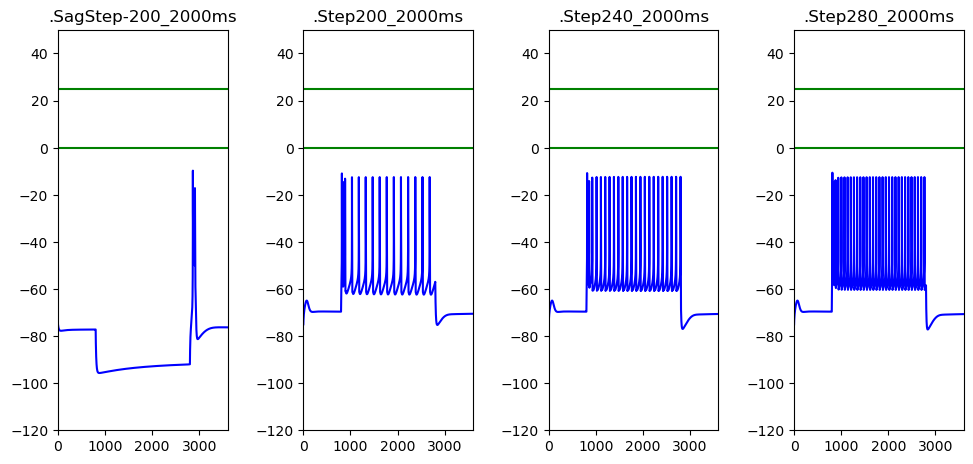

AP too short



control_136 12272 6 | 18
AP_amplitude:	 48.4 	


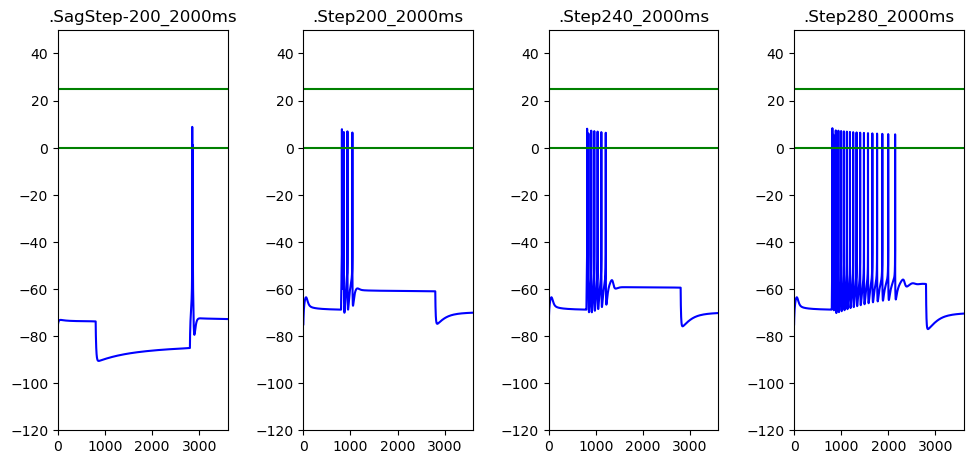





control_136 12311 6 | 19
AP_amplitude:	 32.8 	<<<


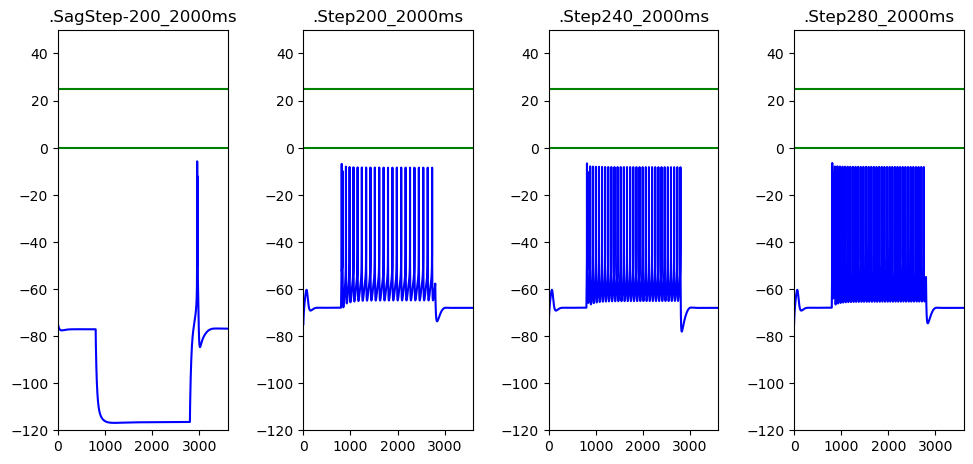

AP too short



control_136 12832 1 | 20
AP_amplitude:	 36.4 	<<<


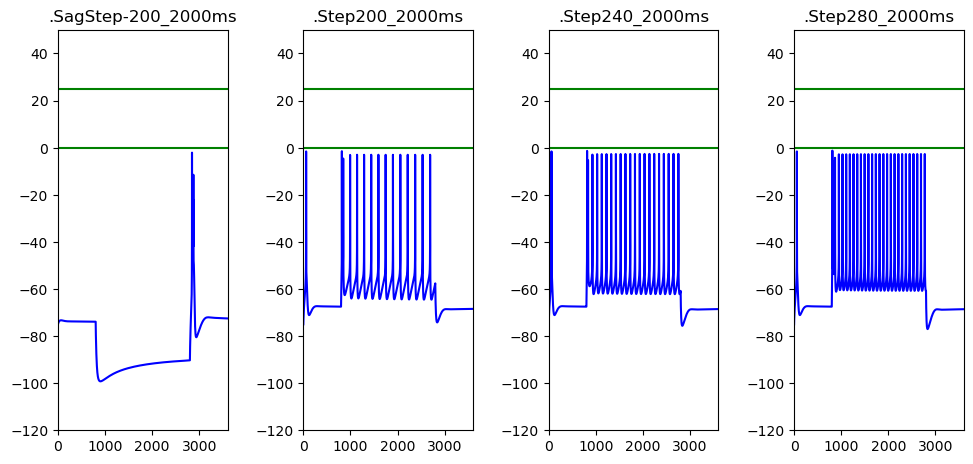

AP too short



control_136 13070 13 | 21
AP_amplitude:	 55.7 	


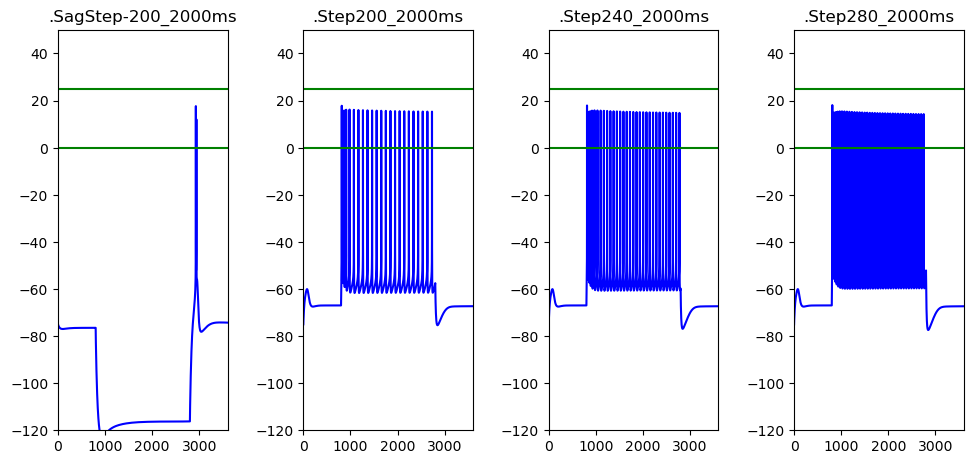





control_136 14307 2 | 22
AP_amplitude:	 72.8 	<<<


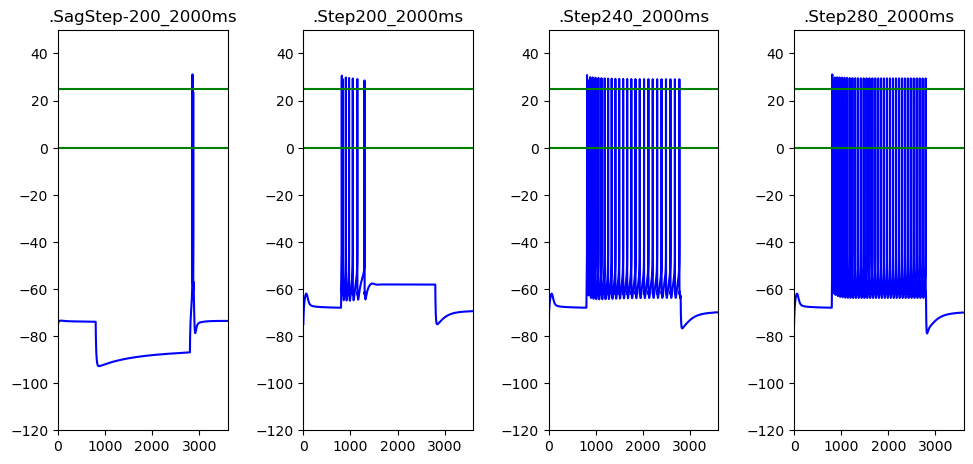

AP too tall



control_136 14321 6 | 23
AP_amplitude:	 33.4 	<<<


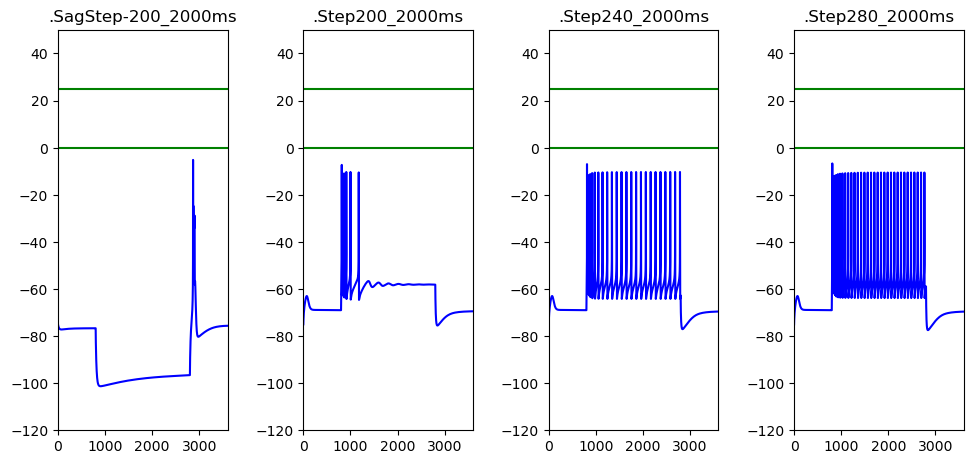

AP too short



control_136 14551 8 | 24
AP_amplitude:	 27.2 	<<<


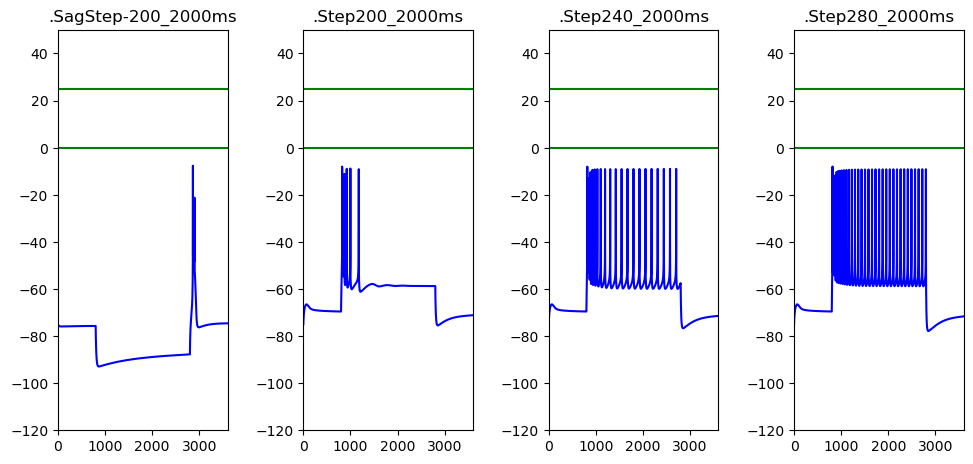

AP too short



control_136 14823 8 | 25
AP_amplitude:	 26.3 	<<<


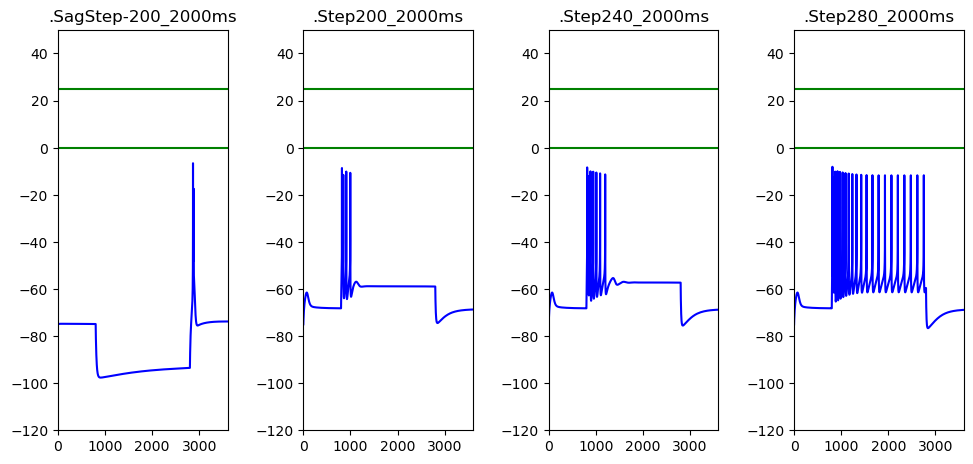

AP too short



control_136 15371 10 | 26
AP_amplitude:	 49.4 	


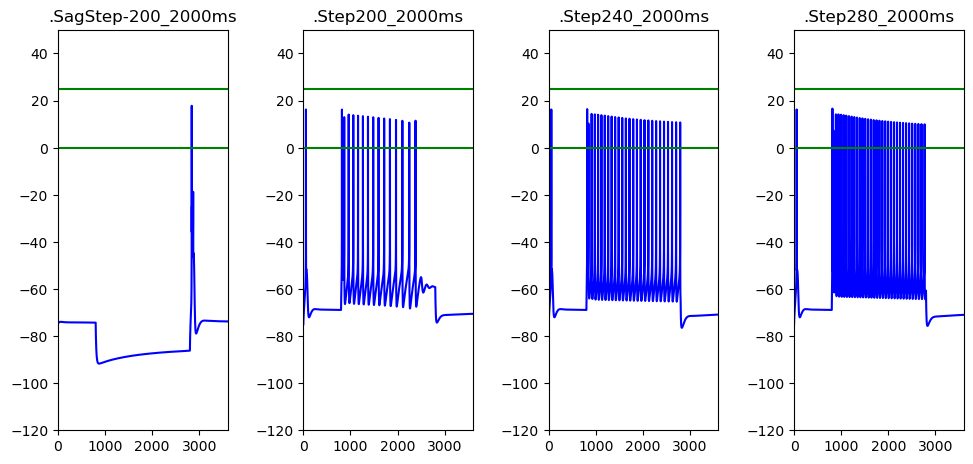





control_136 17574 2 | 27
AP_amplitude:	 39.9 	<<<


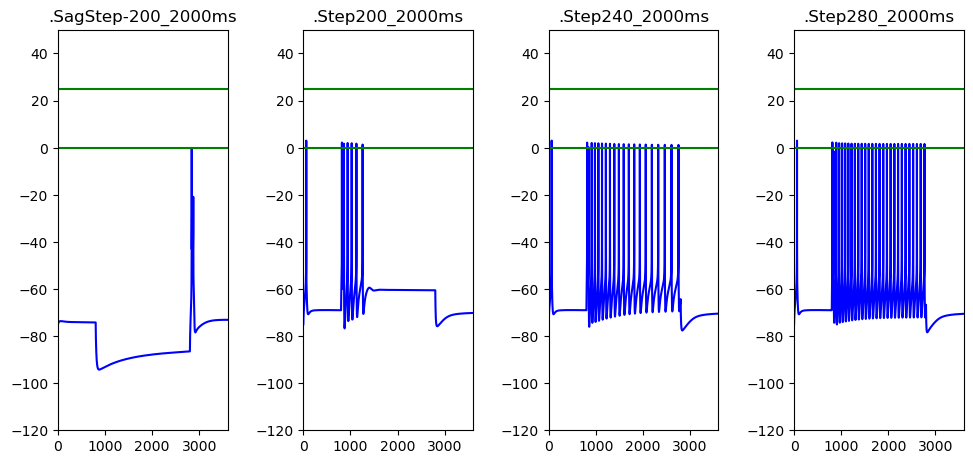

AP too short



control_136 17771 1 | 28
AP_amplitude:	 83.2 	<<<


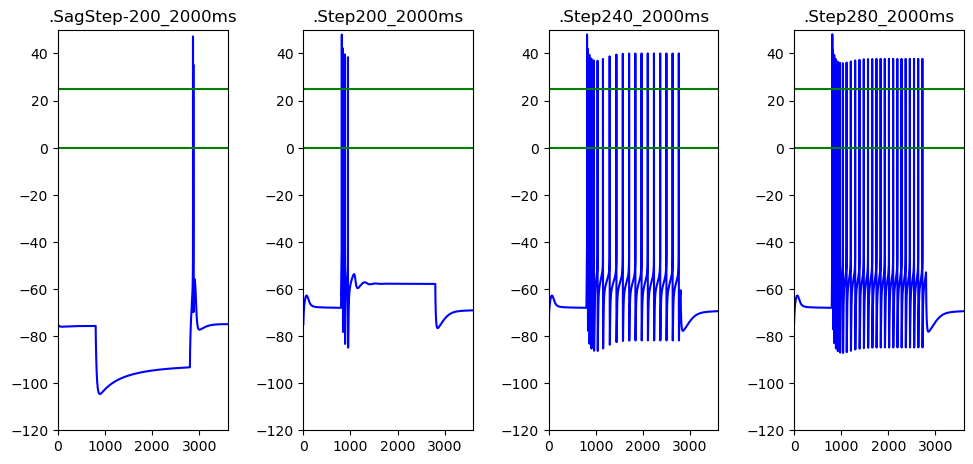

AP too tall



control_136 17811 6 | 29
AP_amplitude:	 33.0 	<<<


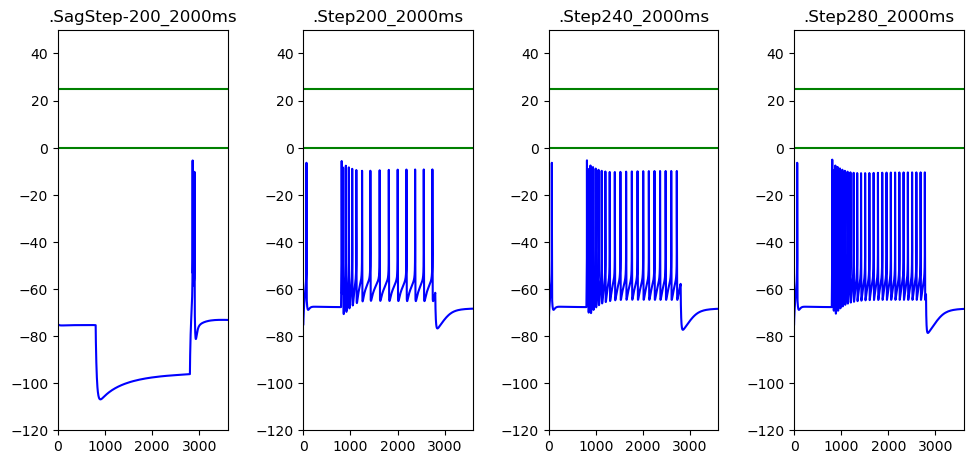

AP too short



control_136 18371 1 | 30
AP_amplitude:	 84.7 	<<<


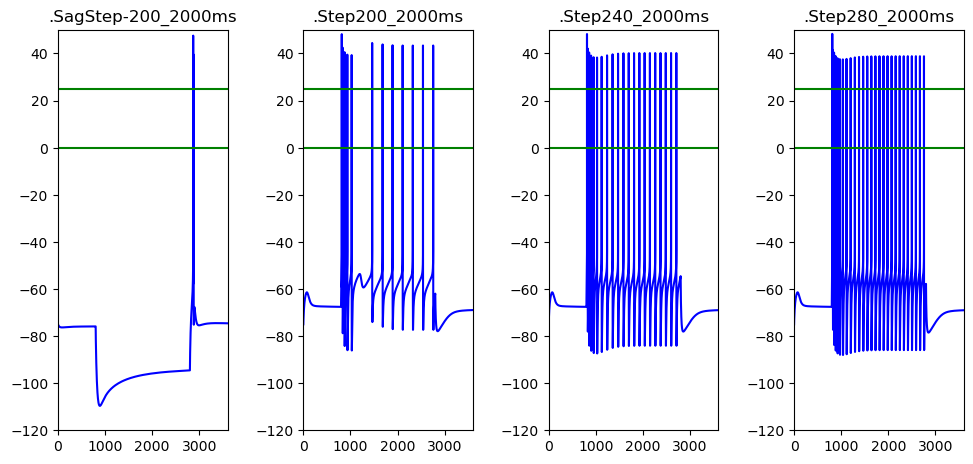

AP too tall



control_136 18606 1 | 31
AP_amplitude:	 24.8 	<<<


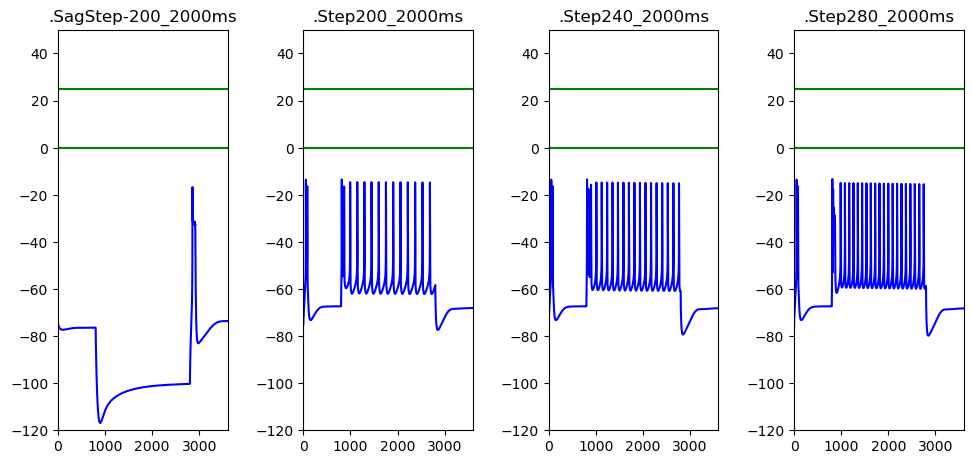

AP too short



control_136 18847 14 | 32
AP_amplitude:	 35.2 	<<<


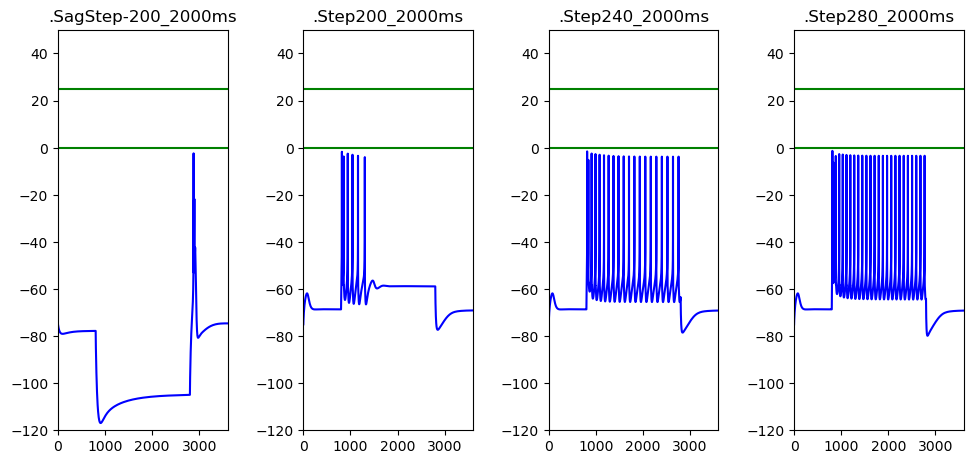

AP too short



control_136 19299 13 | 33
AP_amplitude:	 26.0 	<<<


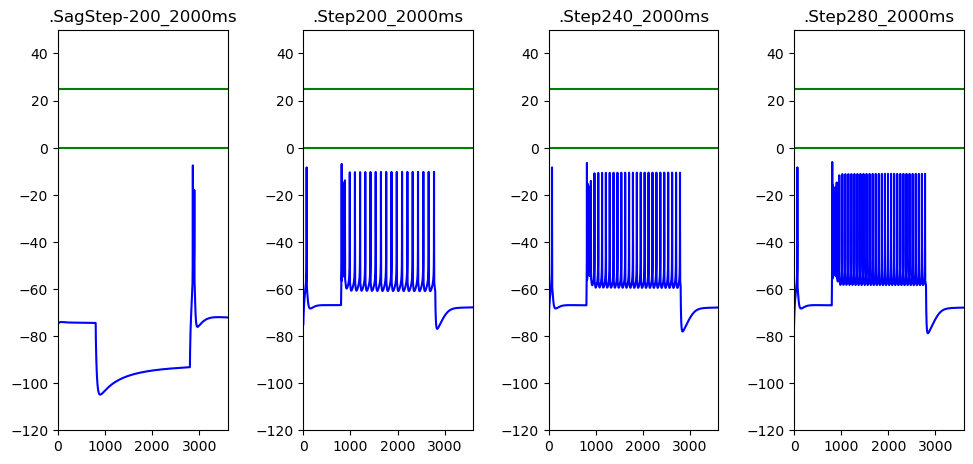

AP too short



control_136 19373 2 | 34
AP_amplitude:	 43.6 	


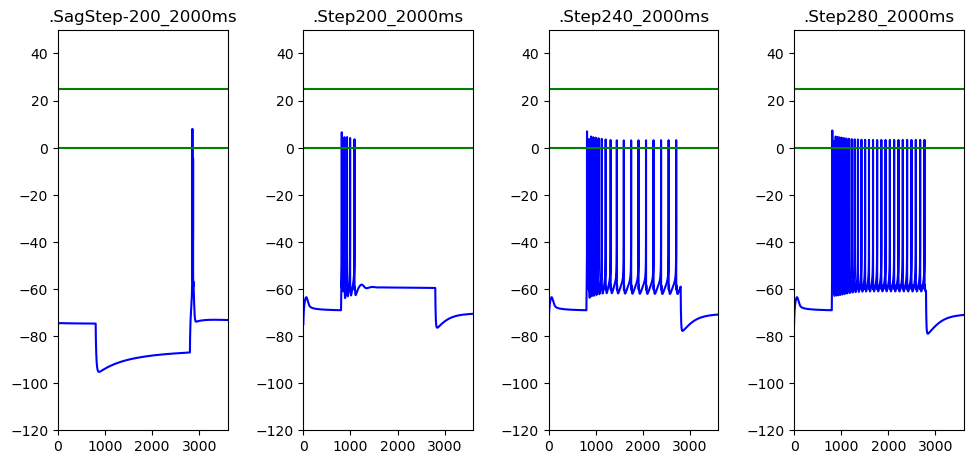





control_136 19602 9 | 35
AP_amplitude:	 38.7 	<<<


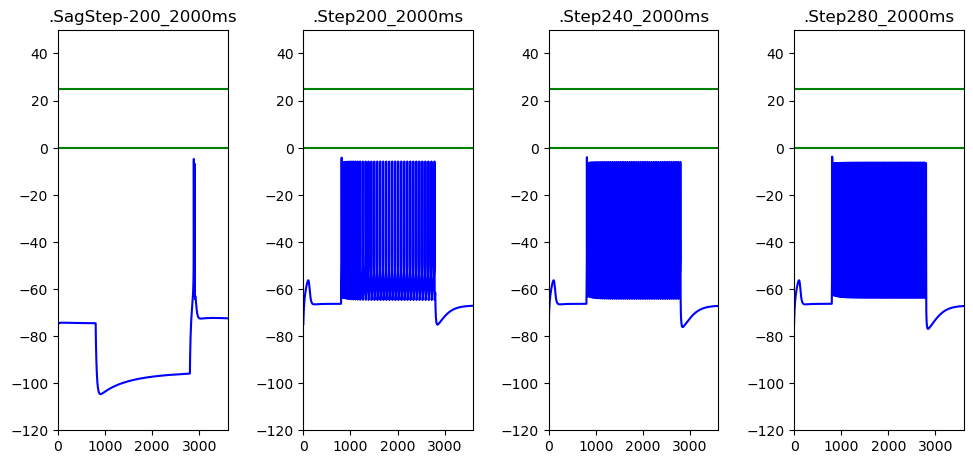

AP too short



control_136 19603 2 | 36
AP_amplitude:	 38.8 	<<<


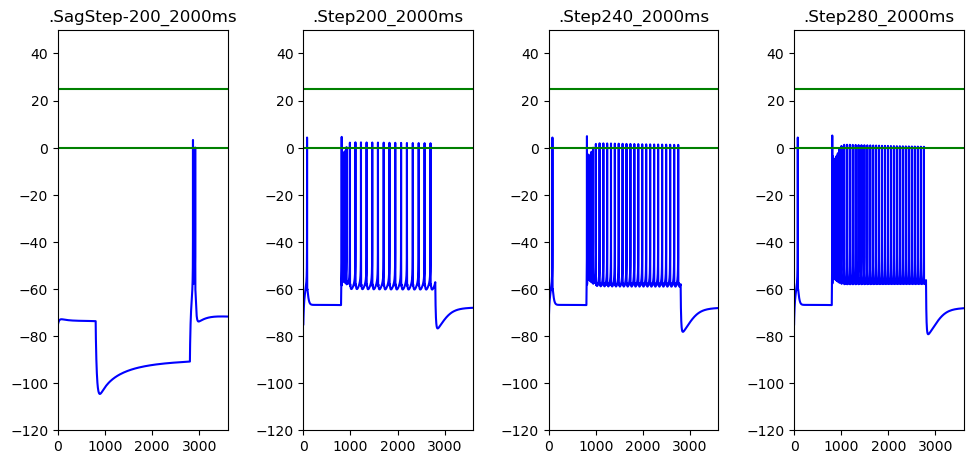

AP too short



control_136 20022 2 | 37
AP_amplitude:	 66.3 	<<<


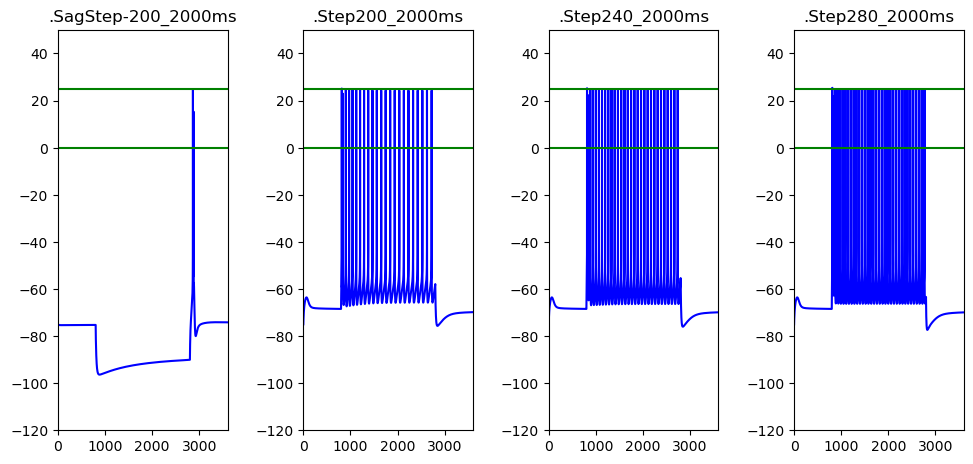

AP too tall



control_136 22009 3 | 38
AP_amplitude:	 47.6 	


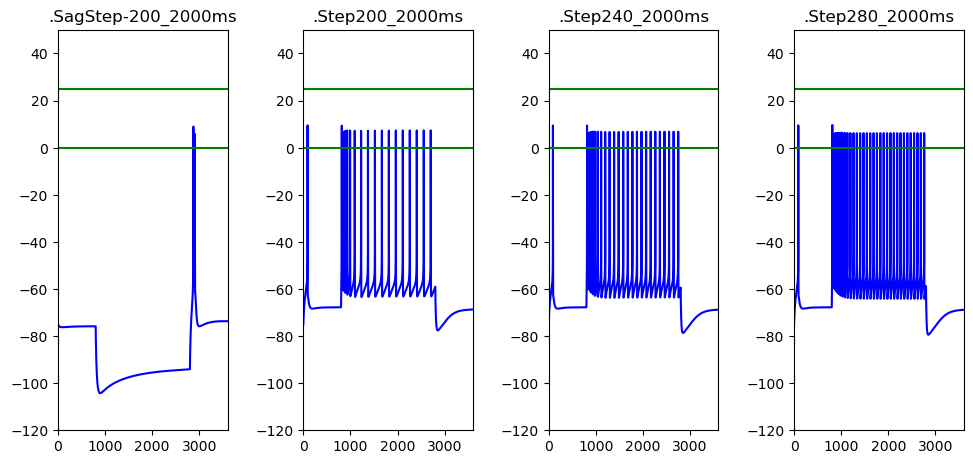





control_136 22356 3 | 39
AP_amplitude:	 49.5 	


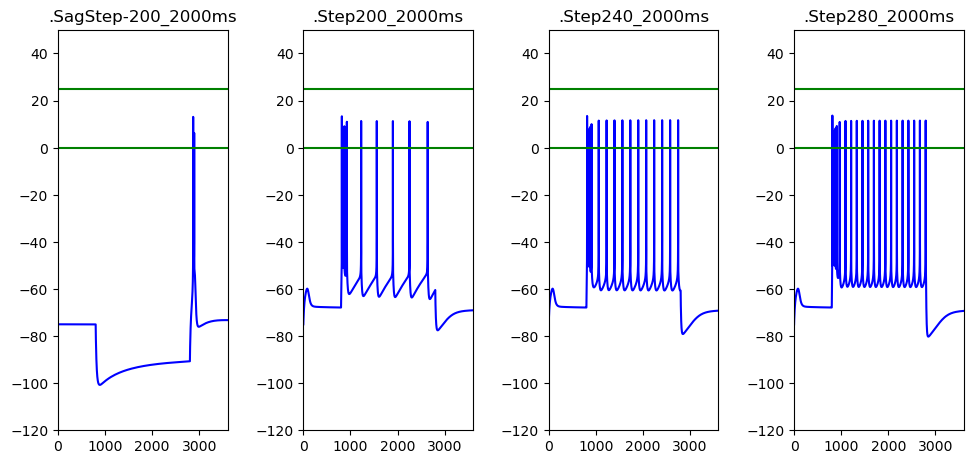





control_136 23034 0 | 40
AP_amplitude:	 27.8 	<<<


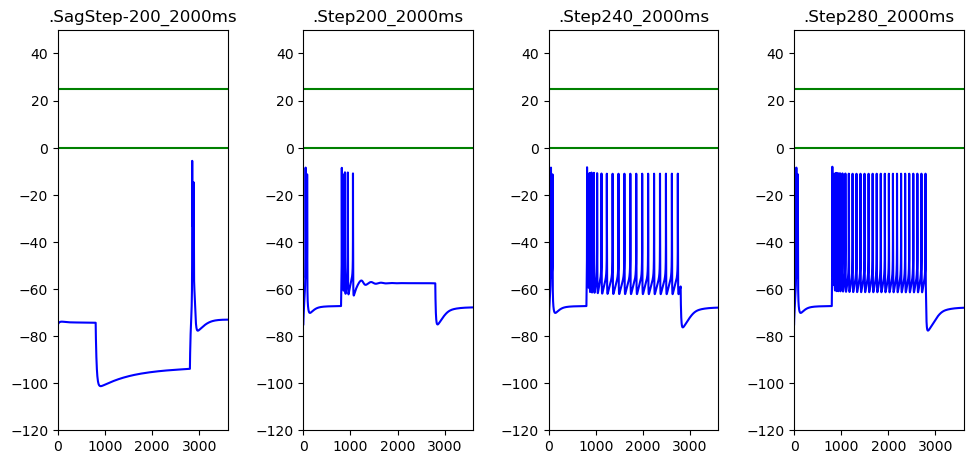

AP too short



control_136 23350 1 | 41
AP_amplitude:	 56.7 	


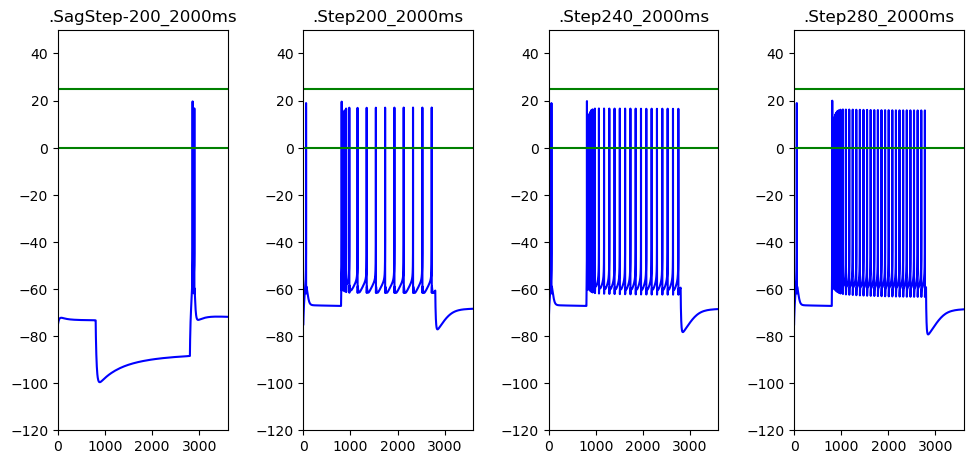





control_136 23614 0 | 42
AP_amplitude:	 71.6 	<<<


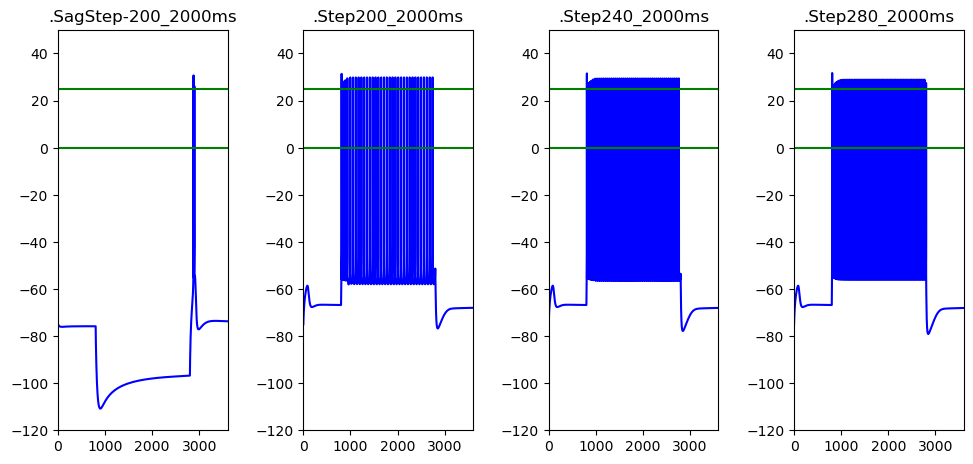

AP too tall



control_136 23808 9 | 43
AP_amplitude:	 44.7 	


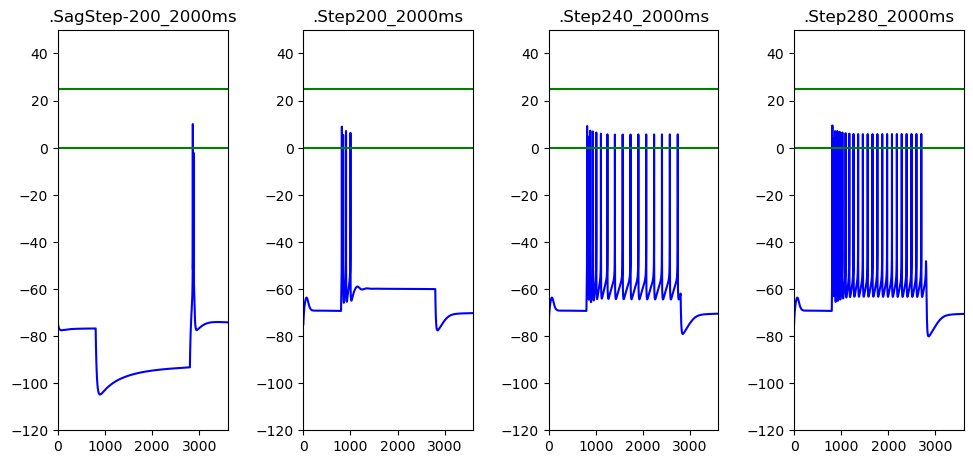





control_136 24334 3 | 44
AP_amplitude:	 52.8 	


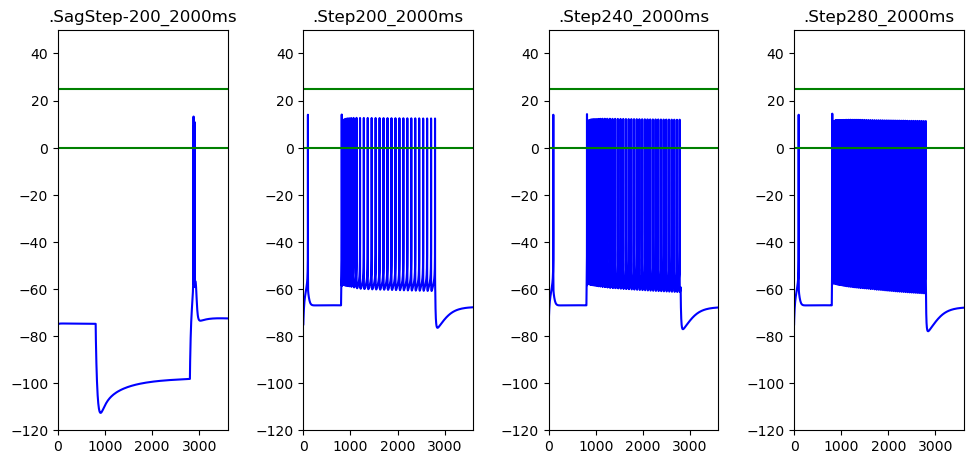





control_136 24340 3 | 45
AP_amplitude:	 45.8 	


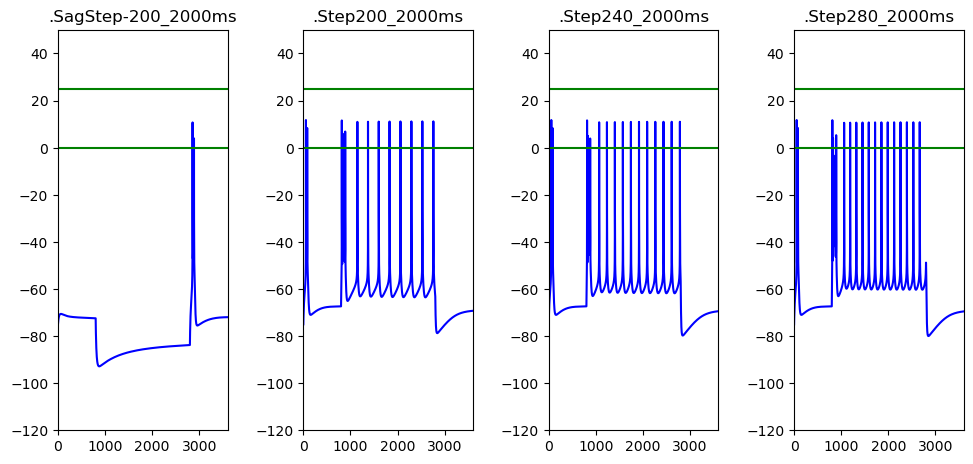





control_136 24590 9 | 46
AP_amplitude:	 23.9 	<<<


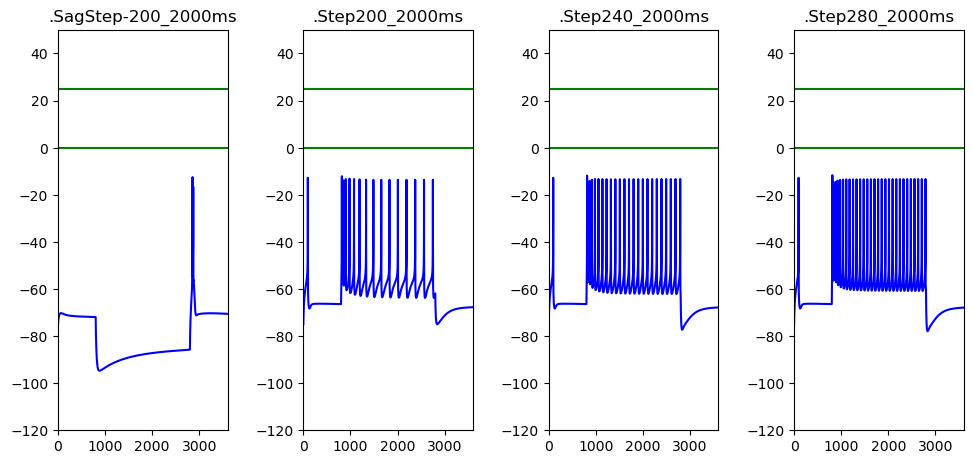

AP too short



lesioned_136 1510 9 | 47
AP_amplitude:	 70.2 	<<<


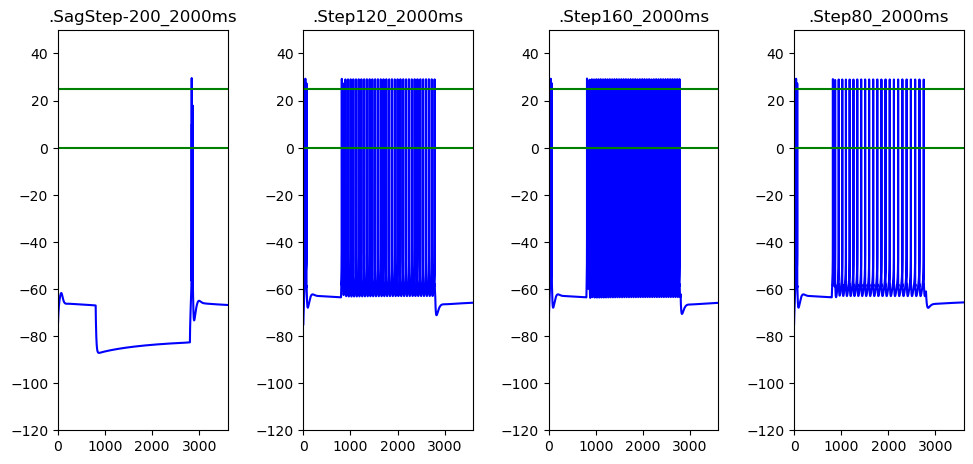

AP too tall



lesioned_136 6269 10 | 48
AP_amplitude:	 46.5 	


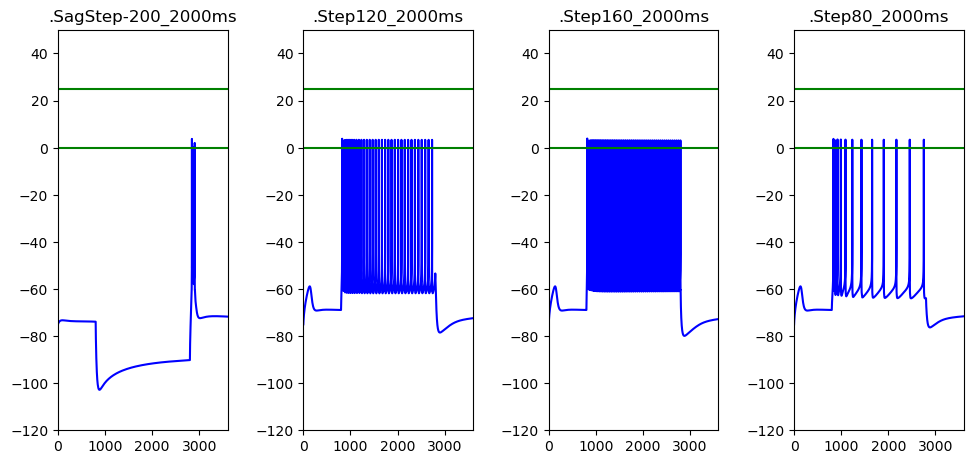





lesioned_136 8365 13 | 49
AP_amplitude:	 28.8 	<<<


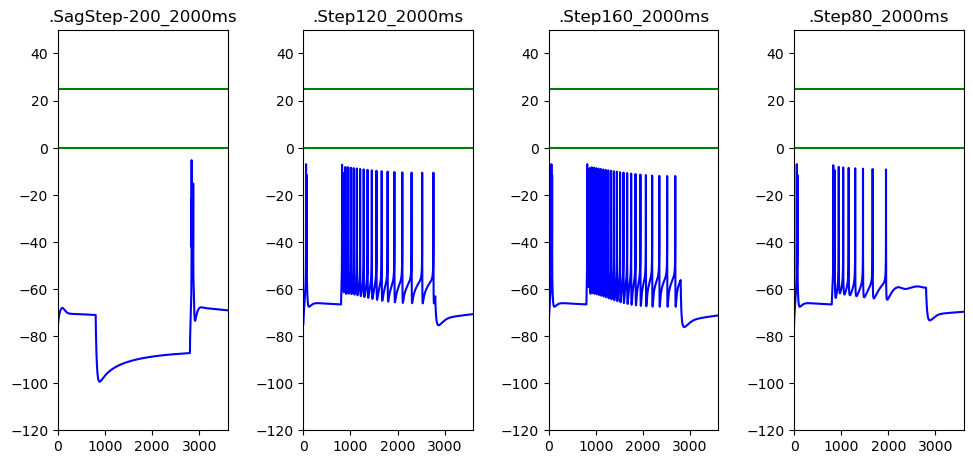

AP too short



lesioned_136 22548 4 | 50
AP_amplitude:	 62.8 	


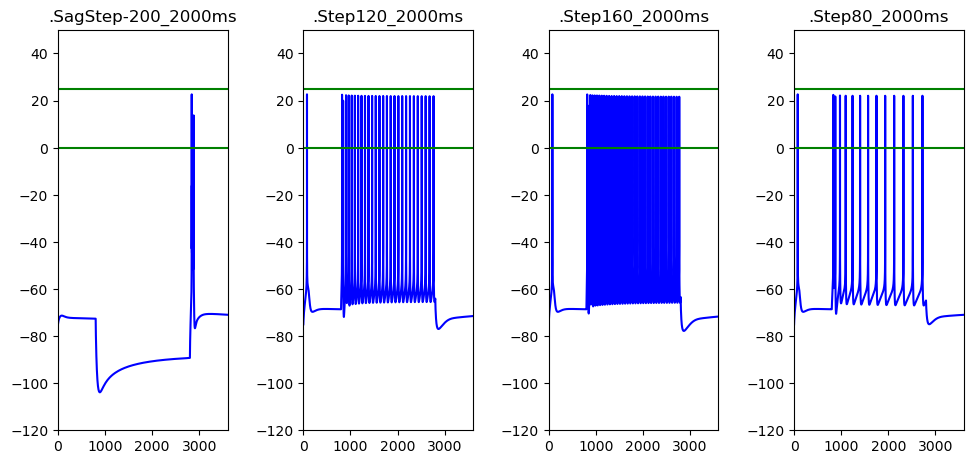





lesioned_136 22871 1 | 51
AP_amplitude:	 73.1 	<<<


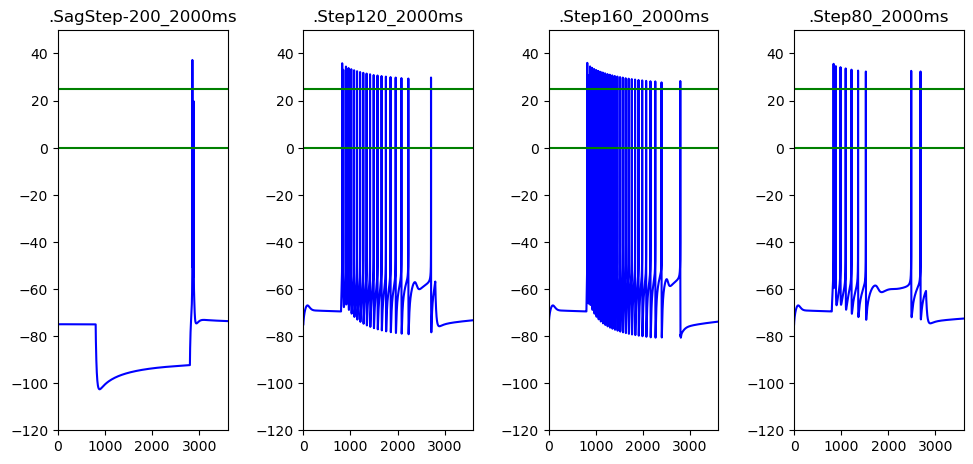

AP too tall



lesioned_136 24567 4 | 52
AP_amplitude:	 31.1 	<<<


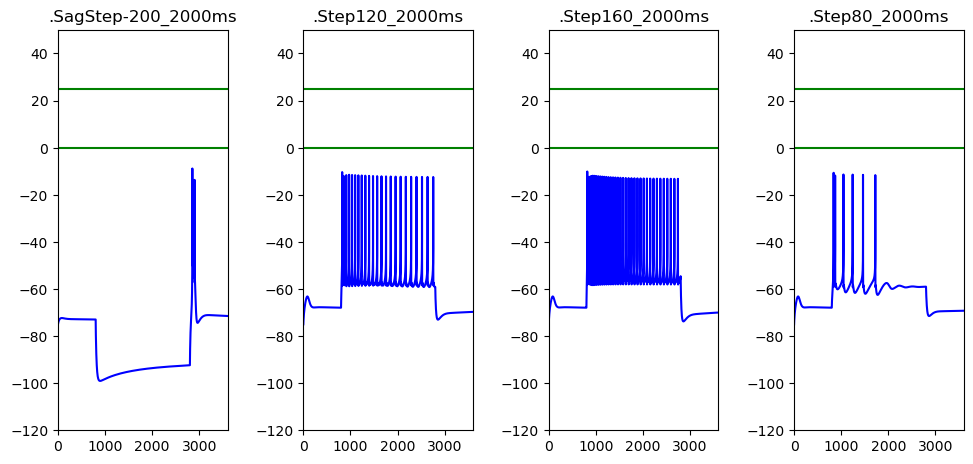

AP too short





In [14]:
ap_amp_min = 40
ap_amp_max = 65

for i in range(n):
    trace = np.load('trace_136_nq_%d.npy' % i, allow_pickle=True).tolist()
    
    del trace['responses']['.Pulse.soma.v']
    del trace['responses']['.Step_2000ms.soma.v']  
    
    print('%s %d %d | %d' % (trace['key'] + (i, )))
    plt.figure(figsize=(15, 5))
    
    # calculate average ap peak, ap amplitude, ahp depth
    ap_amp = []
    for j, (lbl, tr) in enumerate(sorted(trace['responses'].items())):
        if re.match('.Step[0-9]+_2000ms', lbl):
            tt = {
                'T':tr['time'], 
                'V':tr['voltage'],
                'stim_start':[800],
                'stim_end':[2800]
            }
            out = eFELExt.efel.getFeatureValues([tt], ['AP_amplitude'])[0]
            if out['AP_amplitude'] is not None:
                ap_amp.append(np.mean(out['AP_amplitude']))
    ap_amp = np.mean(ap_amp)
    
    #color = 'blue' if (ap_amp >= ap_amp_min and ap_amp <= ap_amp_max) and (ap1_peak >= ap1_peak_min and ap1_peak <= ap1_peak_max) else 'red'

    color = 'blue' if len(note[i]) == 0 else 'red'

    for j, (lbl, tr) in enumerate(sorted(trace['responses'].items())):
        plt.subplot(1, 6, j+1)
        plt.title(lbl.replace('.soma.v', ''))
        plt.plot(tr['time'], tr['voltage'], color=color)
        plt.plot([0, 5000], [0, 0], 'green')
        plt.plot([0, 5000], [25, 25], 'green')
        plt.xlim([0, 3600])
        plt.ylim([-120, 50])
    
    if color == 'red' and not note[i]:
        print ('>>>>>>>>>>>>>> ADD LABEL HERE')
        
    plt.tight_layout(pad=2)
    print('AP_amplitude:\t', round(ap_amp, 1), '\t' if ap_amp >= ap_amp_min and ap_amp <= ap_amp_max else '\t<<<')
    plt.show()

    
    if ap_amp < ap_amp_min:
        note[i] = 'AP too short'
    elif ap_amp > ap_amp_max:
        note[i] = 'AP too tall'
    
        
    print(note[i])
    print('\n\n')

# AP 2 and 1 ratio

In [ ]:
ap_amp_min = 0.9

for i in range(n):
    if len(note[i]):
        continue
        
    trace = np.load('trace_136_nq_%d.npy' % i, allow_pickle=True).tolist()
    
    del trace['responses']['.Pulse.soma.v']
    del trace['responses']['.Step_2000ms.soma.v']  
    del trace['responses']['.SagStep-200_2000ms.soma.v']  
    
    print('%s %d %d | %d' % (trace['key'] + (i, )))
    plt.figure(figsize=(15, 5))
    ap_amp = []
    # calculate average ap peak, ap amplitude, ahp depth
    for j, (lbl, tr) in enumerate(sorted(trace['responses'].items())):
        if re.match('.Step[0-9]+_2000ms', lbl):
            tt = {
                'T':tr['time'], 
                'V':tr['voltage'],
                'stim_start':[800],
                'stim_end':[2800]
            }                
            
            out = eFELExt.efel.getFeatureValues([tt], ['AP1_amp', 'AP2_amp'])[0]
            
            if out['AP1_amp'] is not None:
                ap_amp.append(np.mean(out['AP2_amp'] / out['AP1_amp']))
                
    ap_amp = np.min(ap_amp)
    #color = 'blue' if (ap_amp >= ap_amp_min and ap_amp <= ap_amp_max) and (ap1_peak >= ap1_peak_min and ap1_peak <= ap1_peak_max) else 'red'

    color = 'blue' if len(note[i]) == 0 else 'red'

    for j, (lbl, tr) in enumerate(sorted(trace['responses'].items())):
        plt.subplot(1, 3, j+1)
        plt.title(lbl.replace('.soma.v', ''))
        plt.plot(tr['time'], tr['voltage'], color=color)
        plt.plot([0, 5000], [0, 0], 'green')
        plt.plot([0, 5000], [25, 25], 'green')
        plt.xlim([0, 3600])
        plt.ylim([-80, 30])
        
    plt.tight_layout(pad=2)
    plt.show()
    
    if ap_amp < ap_amp_min:
        note[i] = 'AP ratio too low'     
    
        
    print(note[i])
    print('\n\n')

# AHP depth check

control_136 2299 5 | 0


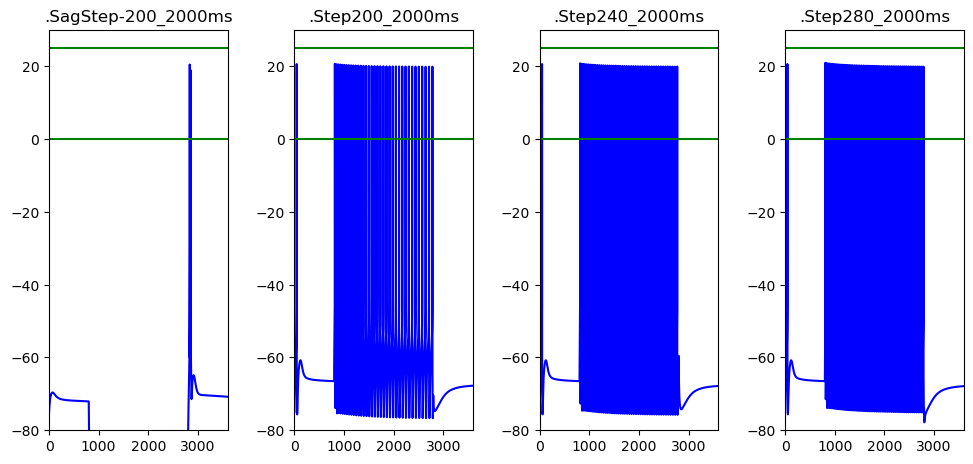





control_136 3537 6 | 1


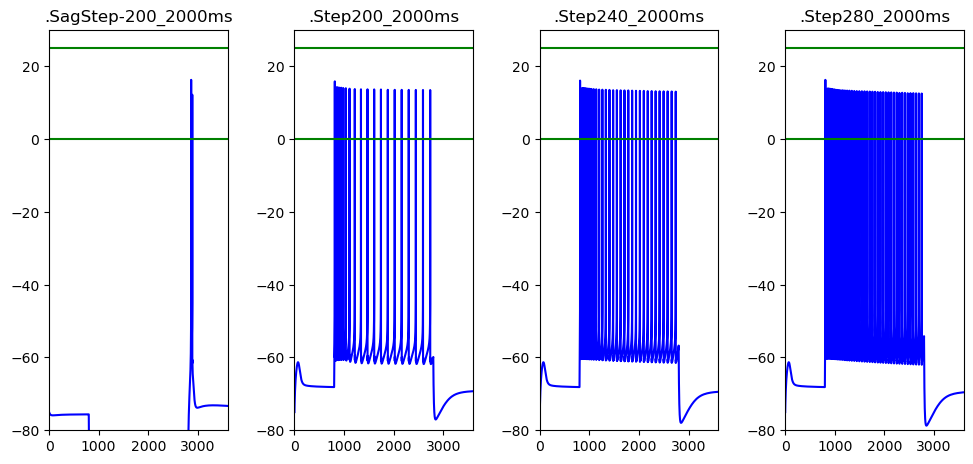





control_136 3844 6 | 2


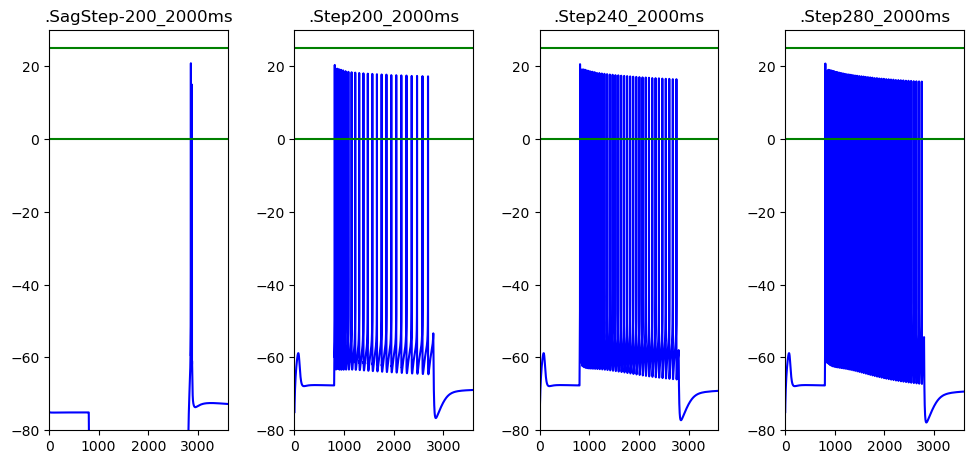





control_136 5818 1 | 3


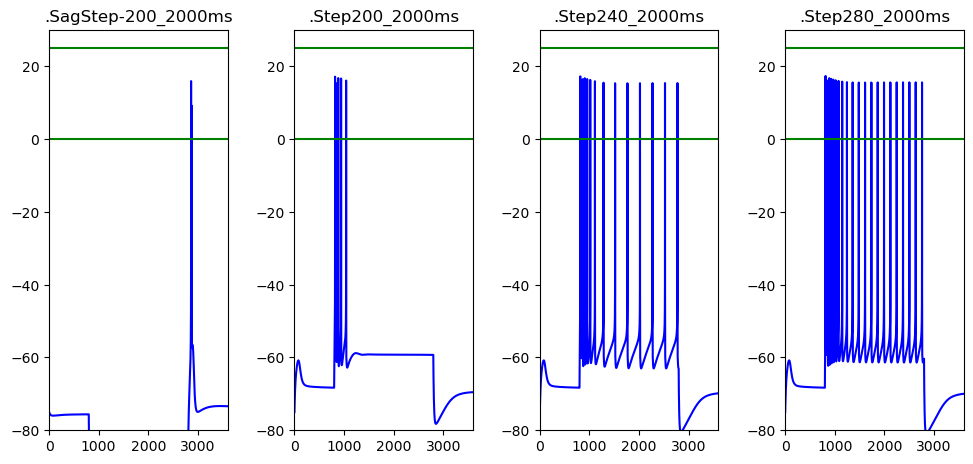





control_136 9289 5 | 10


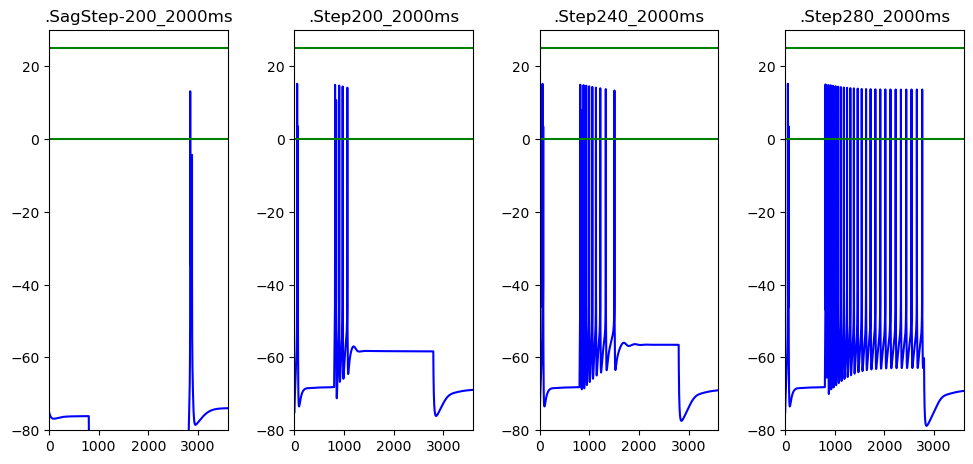





control_136 12031 6 | 16


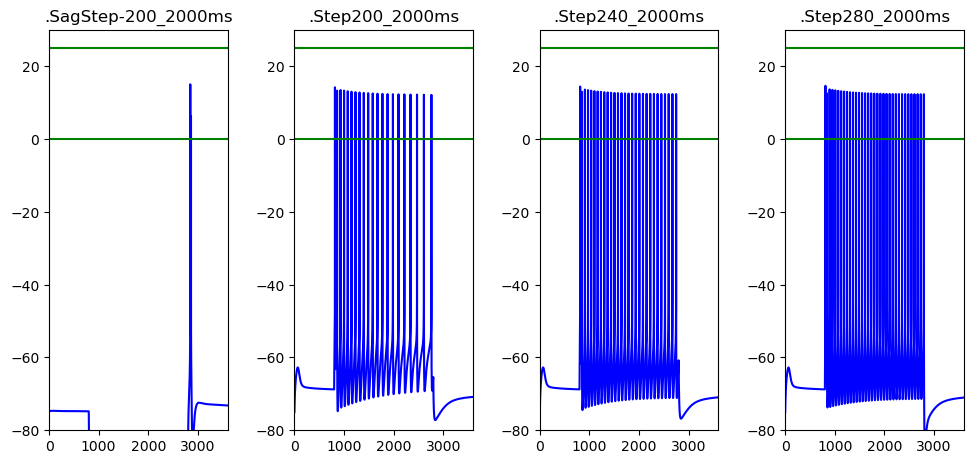





control_136 12272 6 | 18


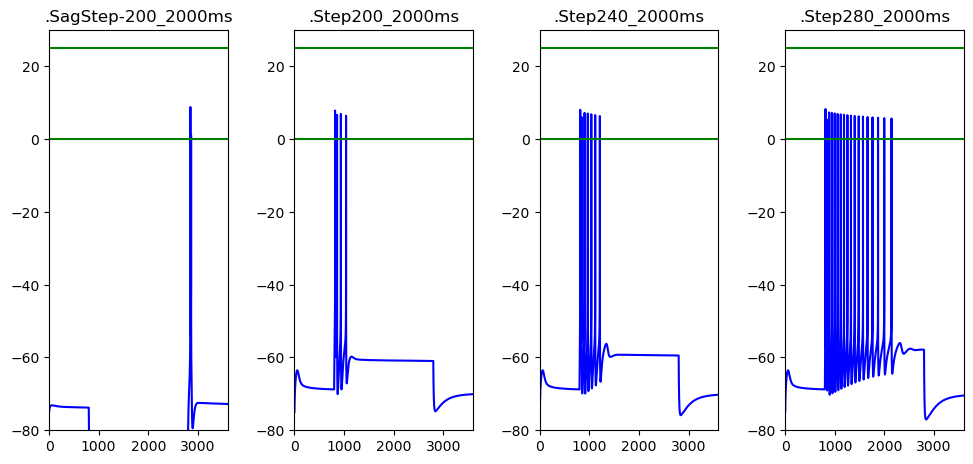





control_136 13070 13 | 21


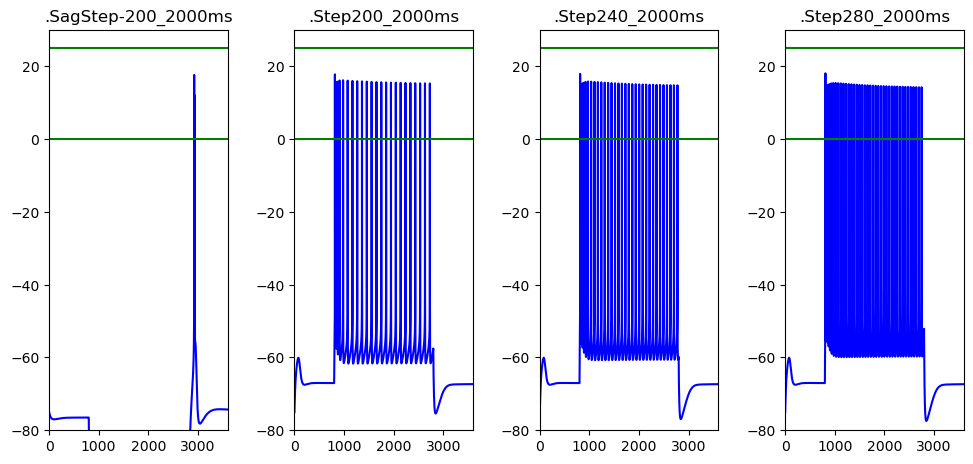





control_136 15371 10 | 26


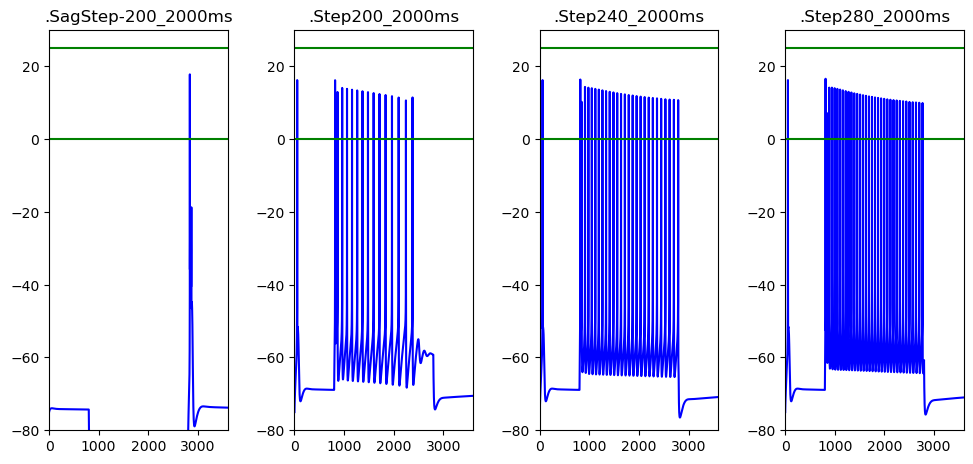





control_136 19373 2 | 34


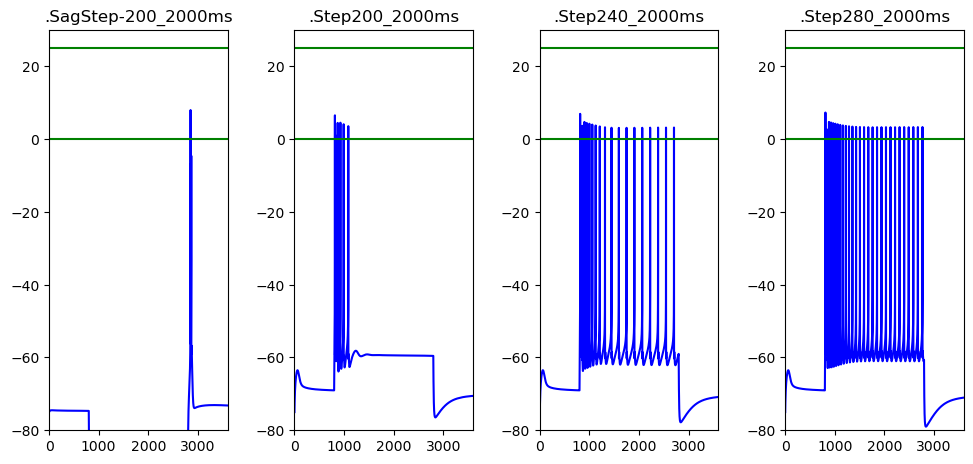





control_136 22009 3 | 38


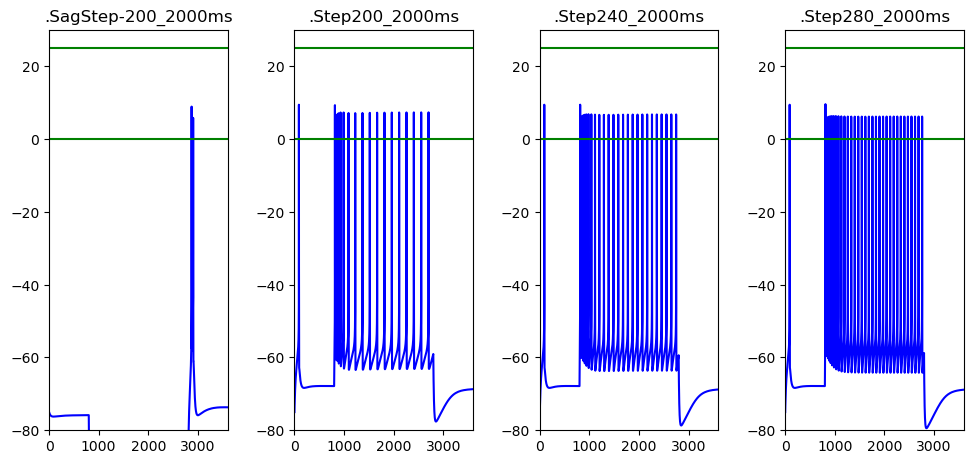





control_136 22356 3 | 39


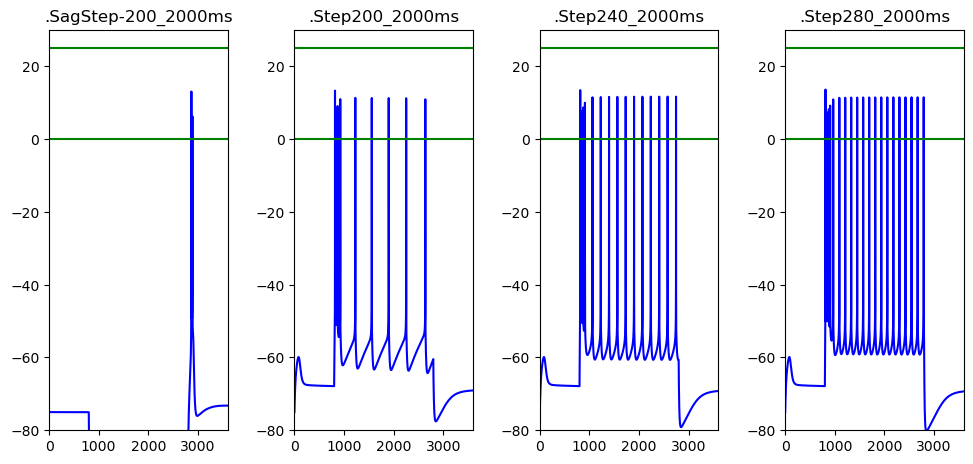





control_136 23350 1 | 41


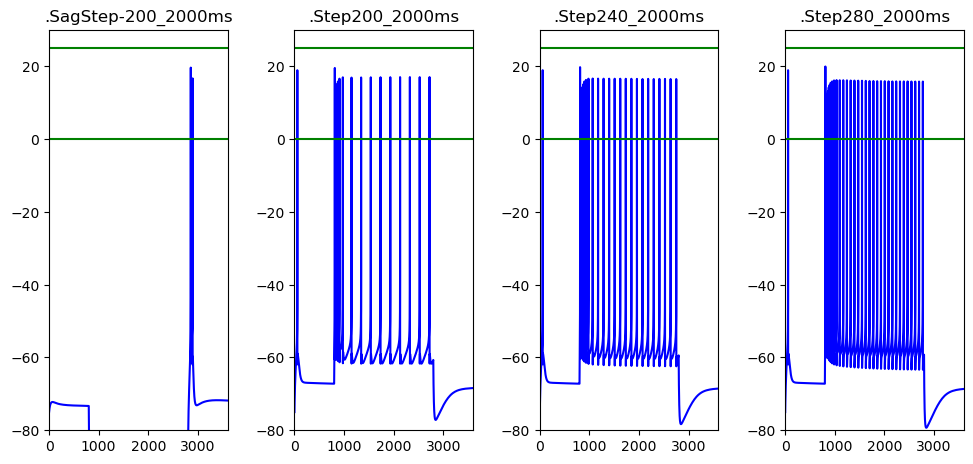





control_136 23808 9 | 43


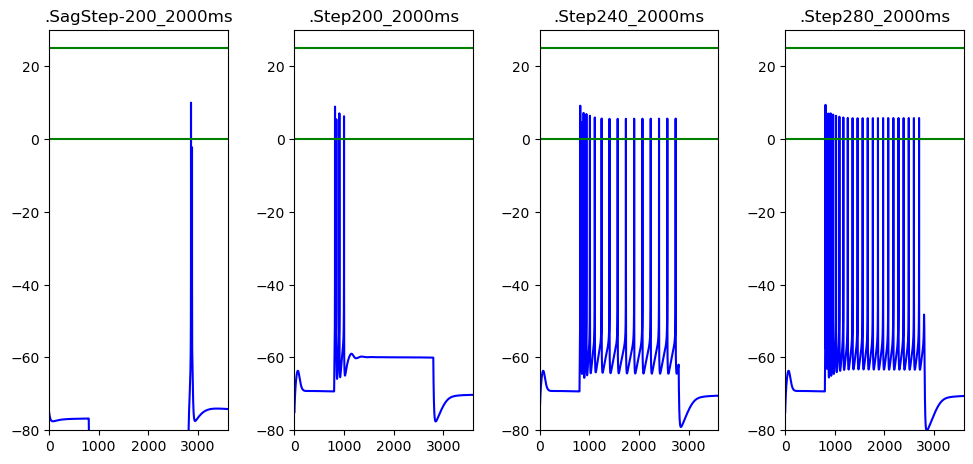





control_136 24334 3 | 44


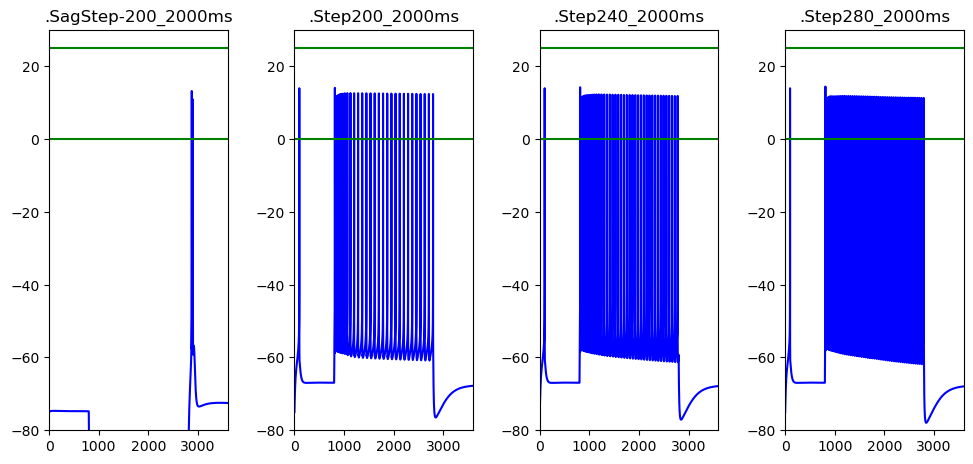





control_136 24340 3 | 45


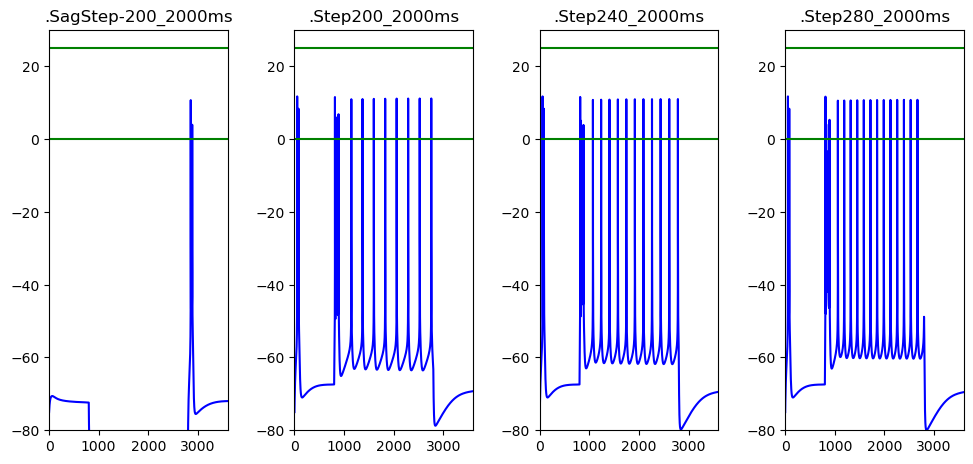





lesioned_136 6269 10 | 48


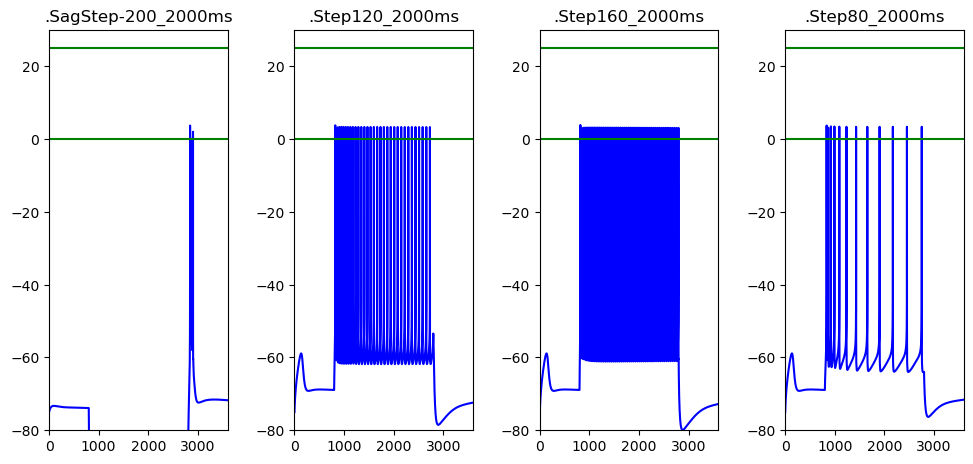





lesioned_136 22548 4 | 50


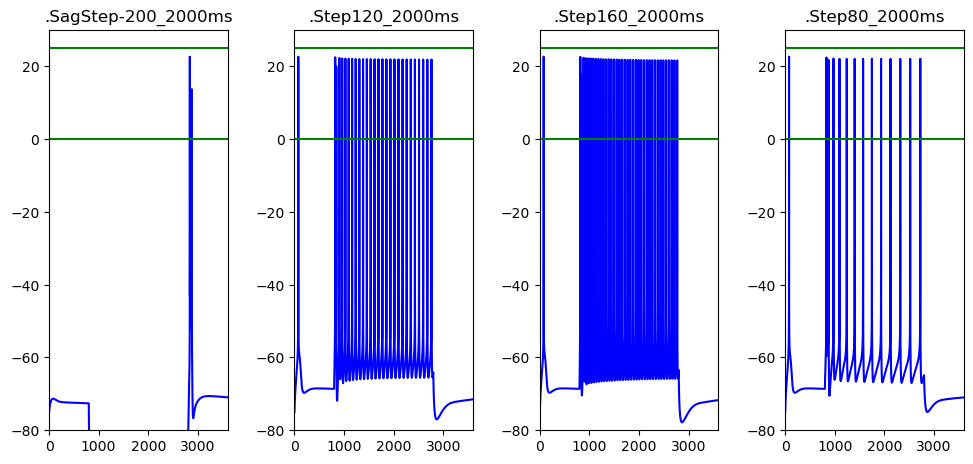

In [15]:
for i in range(n):
    if len(note[i]):
        continue
        
    trace = np.load('trace_136_nq_%d.npy' % i, allow_pickle=True).tolist()
    
    del trace['responses']['.Pulse.soma.v']
    del trace['responses']['.Step_2000ms.soma.v']  
    
    print('%s %d %d | %d' % (trace['key'] + (i, )))
    plt.figure(figsize=(15, 5))
    
    # calculate average ap peak, ap amplitude, ahp depth
    for j, (lbl, tr) in enumerate(sorted(trace['responses'].items())):
        if re.match('.Step[0-9]+_2000ms', lbl):
            tt = {
                'T':tr['time'], 
                'V':tr['voltage'],
                'stim_start':[800],
                'stim_end':[2800]
            }    
    #color = 'blue' if (ap_amp >= ap_amp_min and ap_amp <= ap_amp_max) and (ap1_peak >= ap1_peak_min and ap1_peak <= ap1_peak_max) else 'red'

    color = 'blue' if len(note[i]) == 0 else 'red'

    for j, (lbl, tr) in enumerate(sorted(trace['responses'].items())):
        plt.subplot(1, 6, j+1)
        plt.title(lbl.replace('.soma.v', ''))
        plt.plot(tr['time'], tr['voltage'], color=color)
        plt.plot([0, 5000], [0, 0], 'green')
        plt.plot([0, 5000], [25, 25], 'green')
        plt.xlim([0, 3600])
        plt.ylim([-80, 30])
        
    plt.tight_layout(pad=2)
    plt.show()
        
        
    print(note[i])
    print('\n\n')

In [16]:
for i in [ 0,16,39,41,45, ]:
    note[i] = 'AHP too low'

# Accommodation

In [ ]:
for i in range(n):
    if len(note[i]):
        continue
        
    trace = np.load('trace_136_nq_%d.npy' % i, allow_pickle=True).tolist()
    
    del trace['responses']['.Pulse.soma.v']
    del trace['responses']['.Step_2000ms.soma.v']  
    
    print('%s %d %d | %d' % (trace['key'] + (i, )))
    plt.figure(figsize=(15, 5))

    for j, (lbl, tr) in enumerate(sorted(trace['responses'].items())):
        plt.subplot(1, 6, j+1)
        plt.title(lbl.replace('.soma.v', ''))
        plt.plot(tr['time'], tr['voltage'], color=color)
        plt.plot([0, 5000], [0, 0], 'green')
        plt.plot([0, 5000], [25, 25], 'green')
        plt.xlim([0, 3600])
        plt.ylim([-80, 30])
        
    plt.tight_layout(pad=2)
    plt.show()

    print('\n\n')

In [17]:
# output selected neurons
hof_chk1 = np.load('hof_chk1.npy', allow_pickle=True).tolist()
hof_chk1_keys = sorted(list(hof_chk1.keys()))
hof_chk2 = {}
for i, k in enumerate(hof_chk1_keys):
    if len(note[i]) == 0:
        hof_chk2[k] = hof_chk1[k]
np.save('hof_chk2.npy', hof_chk2, allow_pickle=True)

In [18]:
import pandas as pd
pd.DataFrame(list(hof_chk2.keys()))[0].value_counts()

control_136     11
lesioned_136     2
Name: 0, dtype: int64